# Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional

# Data Loading

In [2]:
def txt_to_pd(file_path):
    """
    Load data from a .txt file and convert into a pandas DataFrame
    Args: 
        file_path (string): Path location of the file to be converted
    Returns:
        df (DataFrame): converted dataframe with index set to "Unit Number"
    """
    
    delimiter = " "

    df = pd.read_csv(file_path, 
               delimiter=delimiter, 
               header=None,
               encoding='utf-8')
    df = df.dropna(axis=1)
    df.columns = ["Unit Number", "Time, in cycles", "Operational Setting 1", "Operational Setting 2", "Operational Setting 3", "Sensor Measurement 1",
              "Sensor Measurement 2", "Sensor Measurement 3", "Sensor Measurement 4", "Sensor Measurement 5", "Sensor Measurement 6", "Sensor Measurement 7", 
              "Sensor Measurement 8", "Sensor Measurement 9", "Sensor Measurement 10", "Sensor Measurement 11", "Sensor Measurement 12", "Sensor Measurement 13", 
              "Sensor Measurement 14", "Sensor Measurement 15", "Sensor Measurement 16", "Sensor Measurement 17", "Sensor Measurement 18", "Sensor Measurement 19", 
              "Sensor Measurement 20", "Sensor Measurement 21"]
    df = df.set_index("Unit Number")
    return df

In [3]:
# Load training and test data
train = txt_to_pd("../src/data/Challenge_Data/train.txt")
test = txt_to_pd("../src/data/Challenge_Data/test.txt")

In [4]:
train.head()

Time, in cycles  Operational Setting 1  Operational Setting 2  \
Unit Number                                                                  
1                          1                10.0047                 0.2501   
1                          2                 0.0015                 0.0003   
1                          3                34.9986                 0.8401   
1                          4                20.0031                 0.7005   
1                          5                42.0041                 0.8405   

             Operational Setting 3  Sensor Measurement 1  \
Unit Number                                                
1                             20.0                489.05   
1                            100.0                518.67   
1                             60.0                449.44   
1                              0.0                491.19   
1                             40.0                445.00   

             Sensor Measurement 2  Sensor Measurement 3  Sensor Measurement 4  \
Unit Number                                                                     
1                          604.13               1499.45               1309.95   
1                          642.13               1584.55               1403.96   
1                          555.42               1368.17               1122.49   
1                          607.03               1488.44               1249.18   
1                          549.52               1354.48               1124.32   

             Sensor Measurement 5  Sensor Measurement 6  ...  \
Unit Number                                              ...   
1                           10.52                 15.49  ...   
1                           14.62                 21.61  ...   
1                            5.48                  8.00  ...   
1                            9.35                 13.65  ...   
1                            3.91                  5.71  ...   

             Sensor Measurement 12  Sensor Measurement 13  \
Unit Number                                                 
1                           372.15                2388.13   
1                           521.81                2388.15   
1                           183.26                2387.95   
1                           314.84                2388.07   
1                           130.44                2387.89   

             Sensor Measurement 14  Sensor Measurement 15  \
Unit Number                                                 
1                          8120.83                 8.6216   
1                          8132.87                 8.3907   
1                          8063.84                 9.3557   
1                          8052.30                 9.2231   
1                          8083.67                 9.2986   

             Sensor Measurement 16  Sensor Measurement 17  \
Unit Number                                                 
1                             0.03                    368   
1                             0.03                    391   
1                             0.02                    334   
1                             0.02                    364   
1                             0.02                    330   

             Sensor Measurement 18  Sensor Measurement 19  \
Unit Number                                                 
1                             2319                  100.0   
1                             2388                  100.0   
1                             2223                  100.0   
1                             2324                  100.0   
1                             2212                  100.0   

             Sensor Measurement 20  Sensor Measurement 21  
Unit Number                                                
1                            28.58                17.1735  
1                            38.99                23.3619  
1                            14.83                 8.8555  
1               

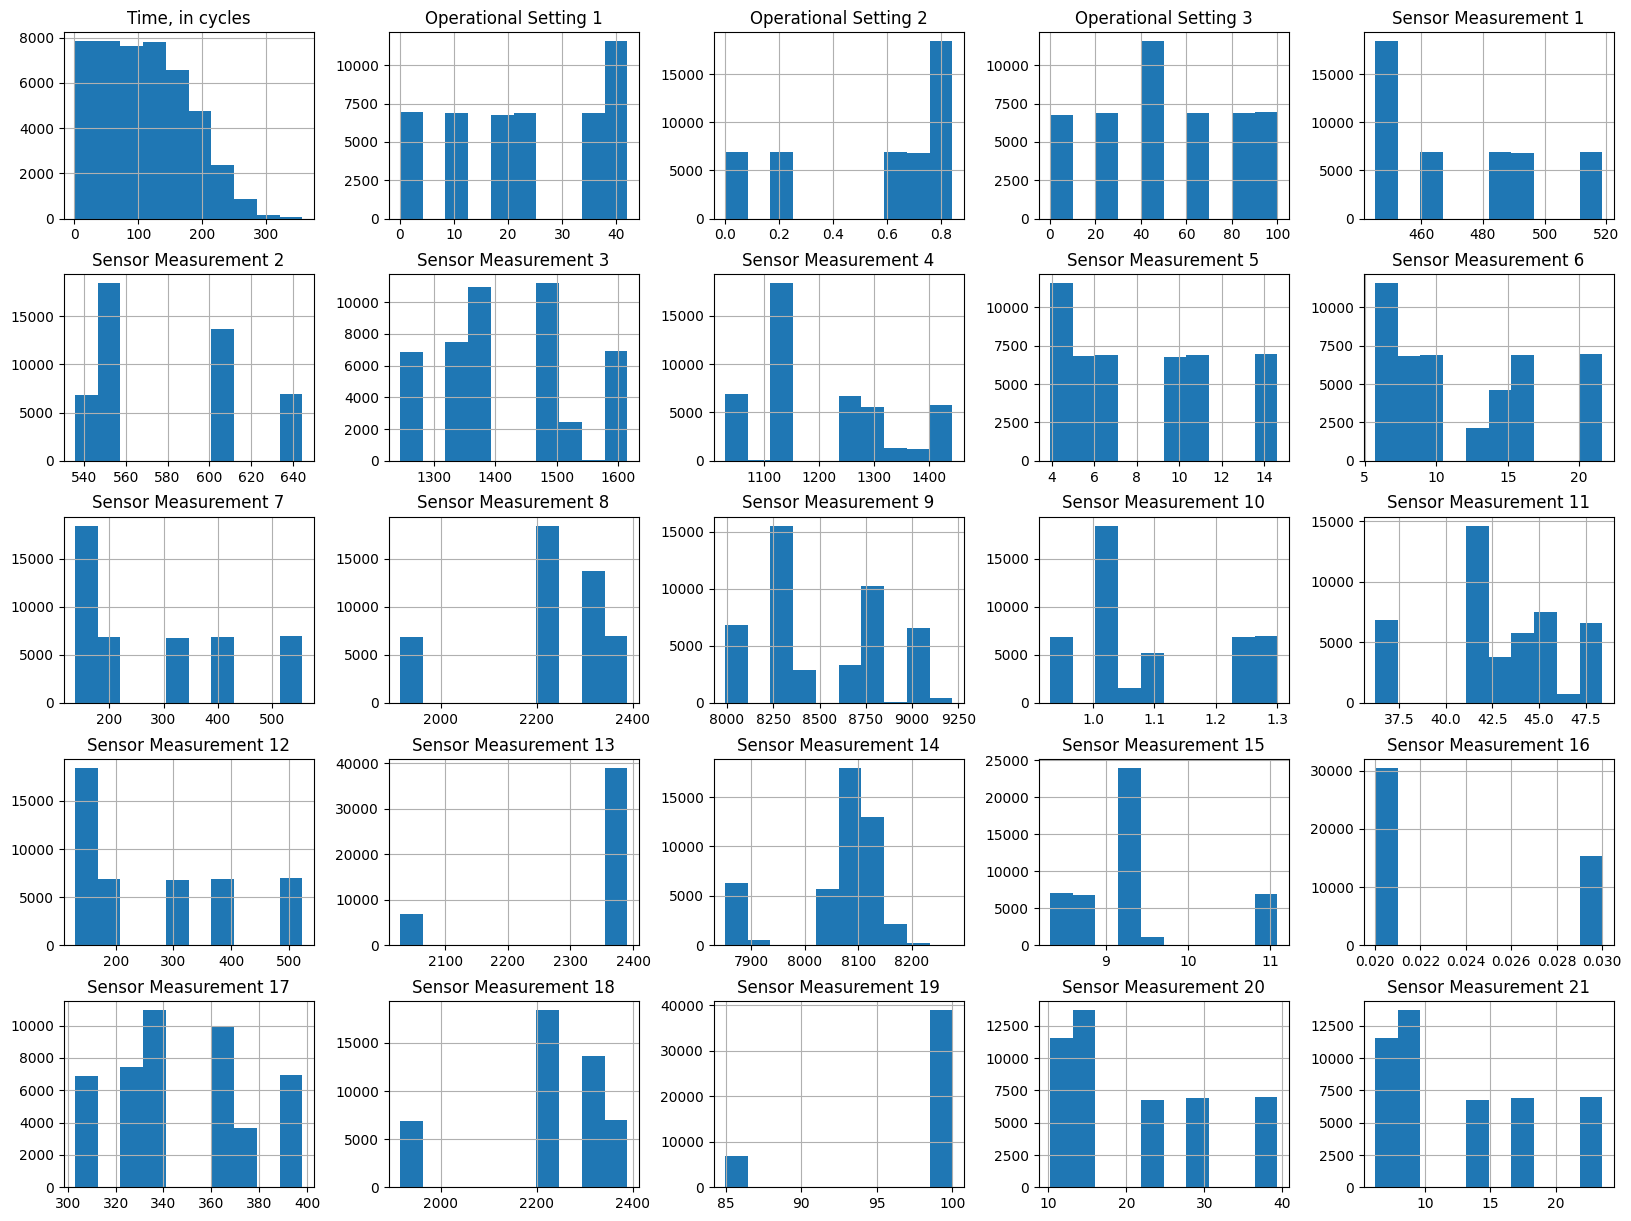

In [5]:
train.hist(bins=10, figsize=(20,15))
plt.show()

In [6]:
test.head()

Time, in cycles  Operational Setting 1  Operational Setting 2  \
Unit Number                                                                  
1                          1                 0.0016                 0.0002   
1                          2                24.9993                 0.6215   
1                          3                 0.0004                 0.0000   
1                          4                10.0034                 0.2500   
1                          5                 0.0024                 0.0011   

             Operational Setting 3  Sensor Measurement 1  \
Unit Number                                                
1                            100.0                518.67   
1                             80.0                462.54   
1                            100.0                518.67   
1                             20.0                489.05   
1                            100.0                518.67   

             Sensor Measurement 2  Sensor Measurement 3  Sensor Measurement 4  \
Unit Number                                                                     
1                          642.88               1587.21               1412.44   
1                          536.45               1262.64               1055.44   
1                          642.65               1589.75               1409.54   
1                          604.44               1499.93               1315.34   
1                          642.74               1585.47               1408.12   

             Sensor Measurement 5  Sensor Measurement 6  ...  \
Unit Number                                              ...   
1                           14.62                 21.61  ...   
1                            7.05                  9.02  ...   
1                           14.62                 21.61  ...   
1                           10.52                 15.49  ...   
1                           14.62                 21.61  ...   

             Sensor Measurement 12  Sensor Measurement 13  \
Unit Number                                                 
1                           521.44                2388.10   
1                           164.32                2027.95   
1                           521.15                2388.19   
1                           371.42                2388.21   
1                           520.86                2388.13   

             Sensor Measurement 14  Sensor Measurement 15  \
Unit Number                                                 
1                          8124.04                 8.4363   
1                          7865.20                10.8935   
1                          8121.12                 8.4620   
1                          8123.53                 8.6815   
1                          8118.30                 8.4617   

             Sensor Measurement 16  Sensor Measurement 17  \
Unit Number                                                 
1                             0.03                    393   
1                             0.02                    308   
1                             0.03                    393   
1                             0.03                    369   
1                             0.03                    392   

             Sensor Measurement 18  Sensor Measurement 19  \
Unit Number                                                 
1                             2388                 100.00   
1                             1915                  84.93   
1                             2388                 100.00   
1                             2319                 100.00   
1                             2388                 100.00   

             Sensor Measurement 20  Sensor Measurement 21  
Unit Number                                                
1                            38.97                23.3029  
1                            14.29                 8.6686  
1                            38.91                23.2693  
1               

# Data Exploration and Pre-processing

## Data Exploration

In [7]:
# Get Actual Remaining Life
unique_list = train.index.unique().tolist()
len(unique_list)
for i in range(len(unique_list)):
    train.loc[i+1, 'Cycle Max'] = train.loc[i+1]['Time, in cycles'].max()
train['Remaining Life'] = train['Time, in cycles'] - train['Cycle Max']

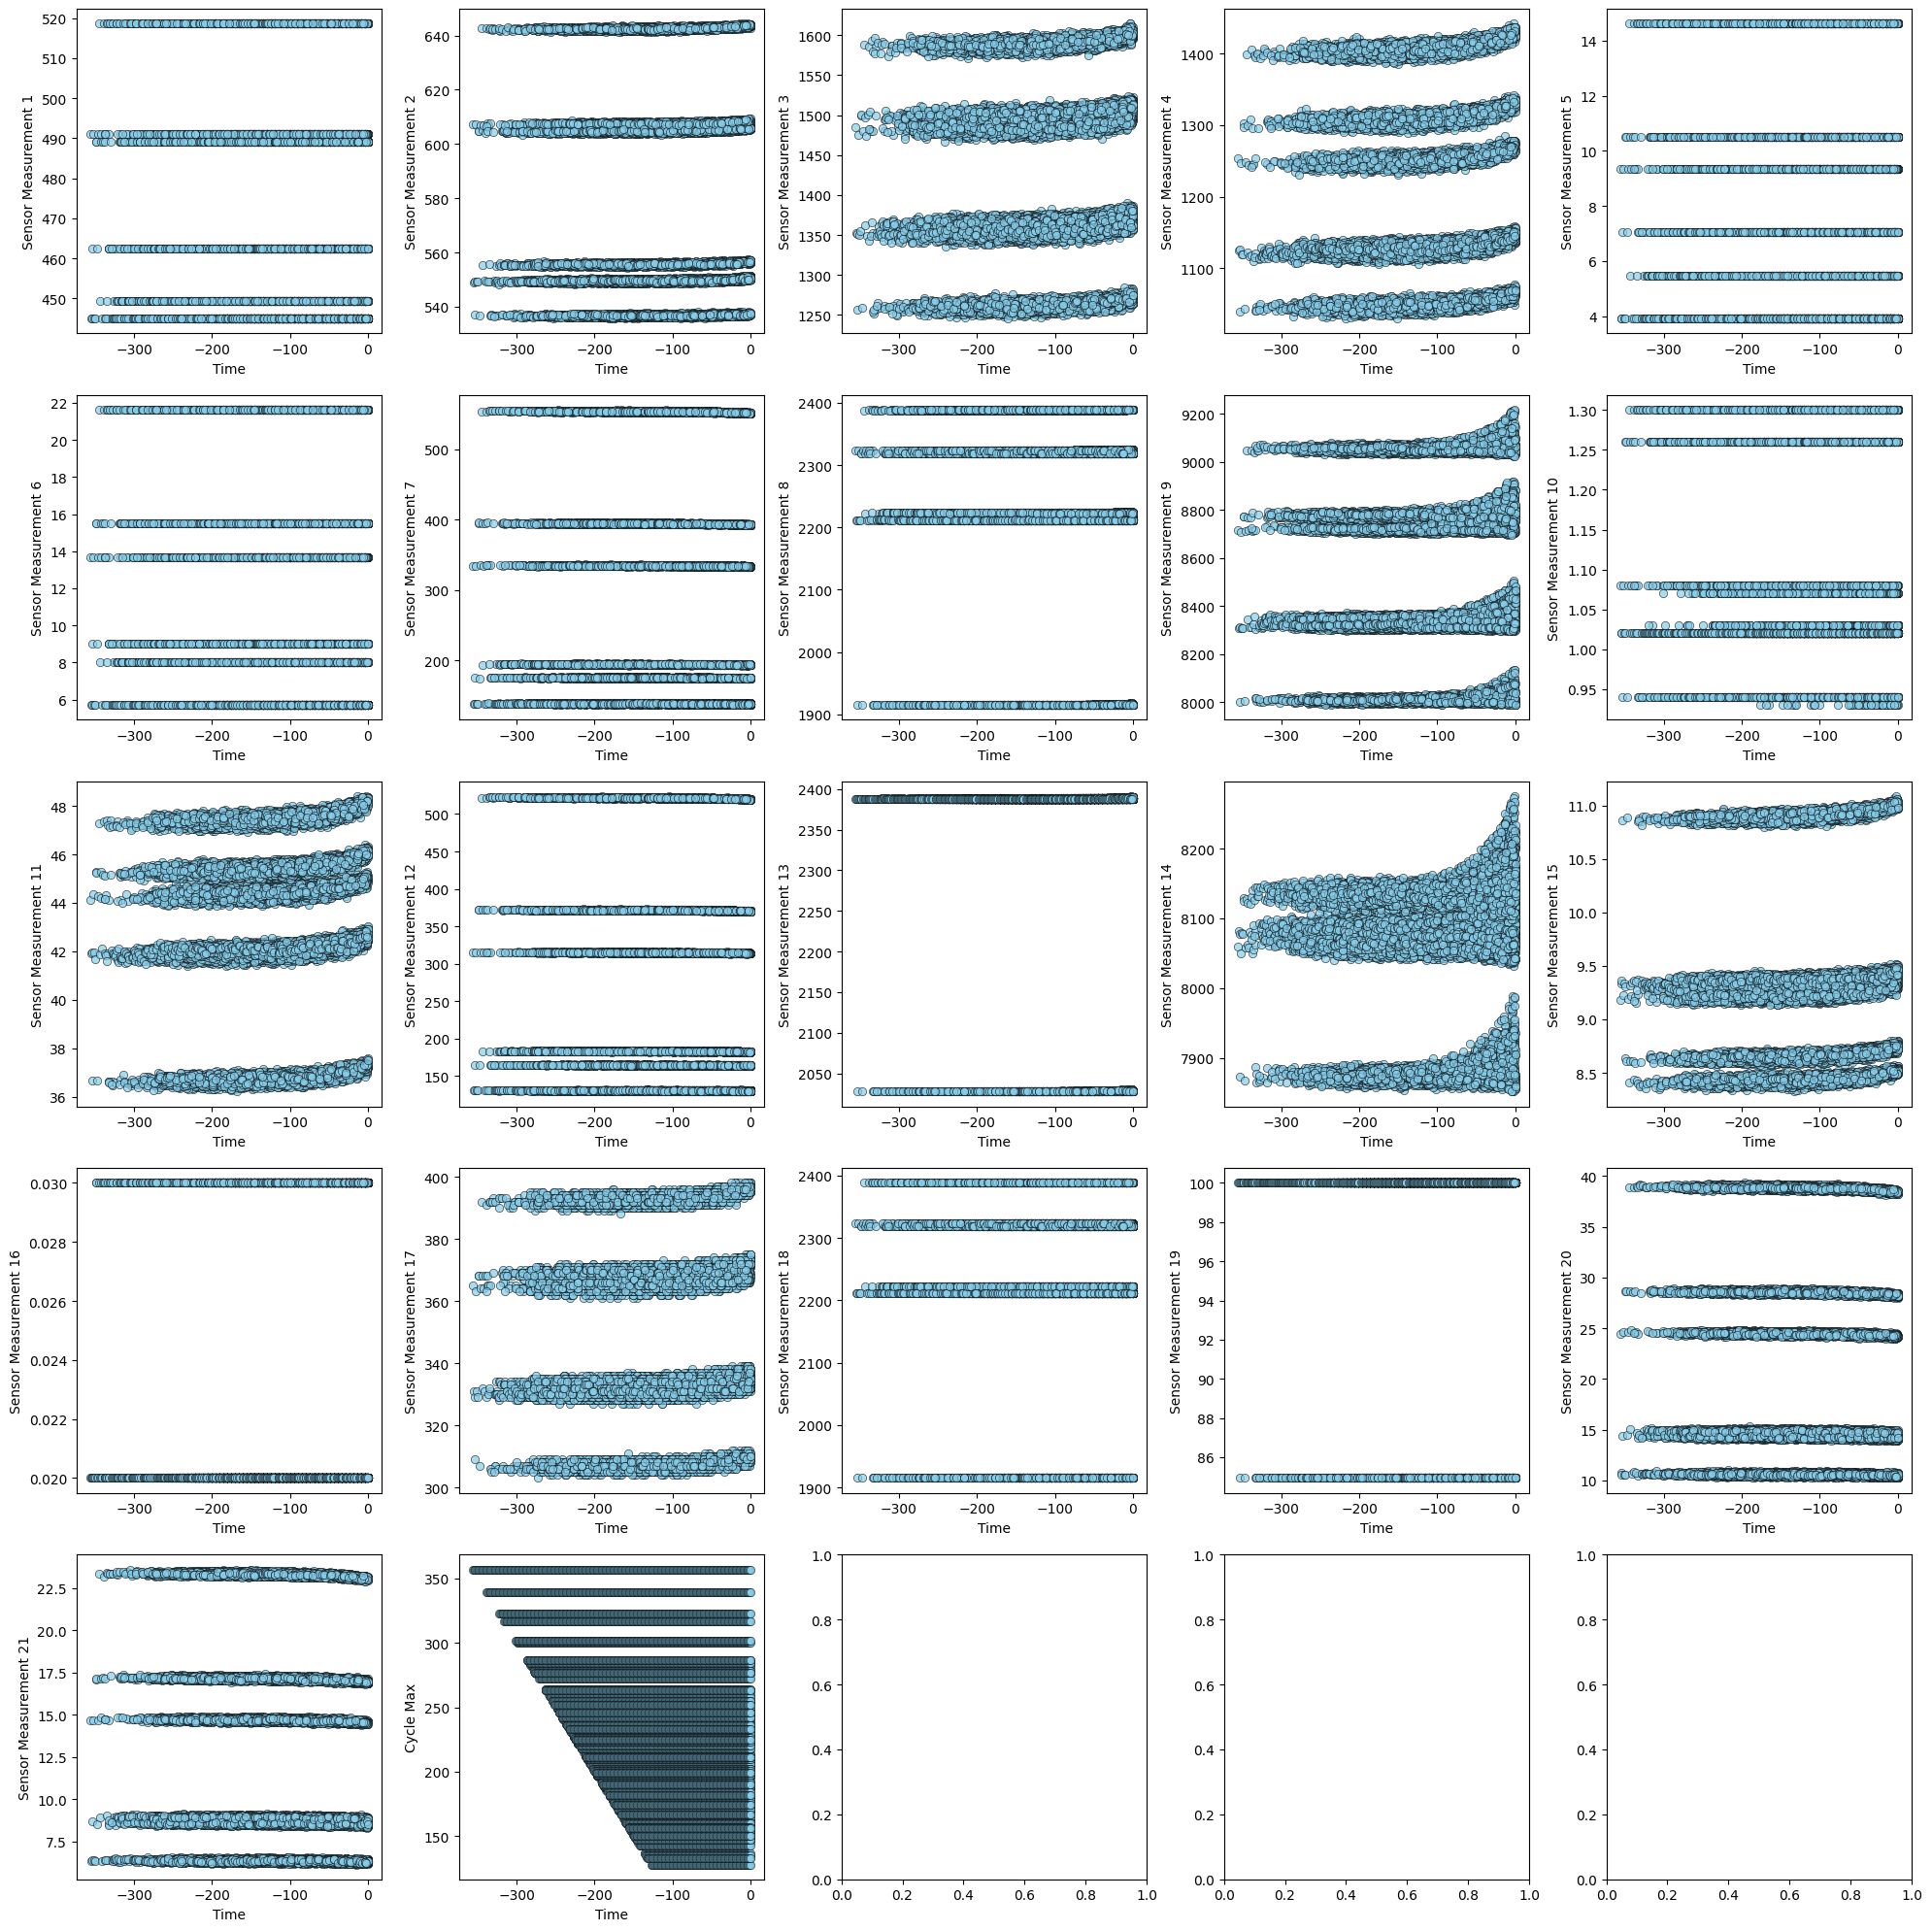

In [8]:
# Plot Remaining Life vs Sensor Measurement of all units and all clusters
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20)) 
for i in range(len(train.columns)-5):
    # Scatter plot on the ith subplot on cluster 0
    axs[i//5, i-(i//5)*5].scatter(train['Remaining Life'], train[train.columns[i+4]], 
                   color='skyblue', alpha=0.7, edgecolors='black', linewidths=0.5)
    axs[i//5, i-(i//5)*5].set_xlabel('Time')
    axs[i//5, i-(i//5)*5].set_ylabel(train.columns[i+4])
# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

In [9]:
# Get operational data
op_data = train[['Operational Setting 1', 'Operational Setting 2', 'Operational Setting 3']]

In [10]:
# # Get Operating Clusters using unsupervised learning (K-means Clustering)
# # Calculate for silhoutte score to determine optimal K-means clustering
# # Higher silhouette score = better clustering
# scores = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     labels = kmeans.fit_predict(op_data)
#     score = silhouette_score(op_data, labels)
#     print("cluster " + str(k) + " - " + str(score))
#     scores.append(score)

[[1.51675295e-03 4.97670406e-04 1.00000000e+02]
 [3.50030533e+01 8.40489284e-01 6.00000000e+01]
 [1.00029627e+01 2.50502528e-01 2.00000000e+01]
 [4.20030440e+01 8.40510423e-01 4.00000000e+01]
 [2.50030126e+01 6.20516407e-01 8.00000000e+01]
 [2.00029465e+01 7.00497164e-01 8.81072992e-13]]


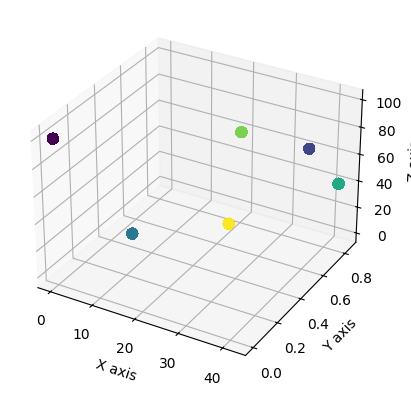

In [11]:
# Create and fit K-Means model using the optimal cluster number (k=6)
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(op_data)

# Get cluster centers
centers = kmeans.cluster_centers_
print(centers)

# Plot k-clusters 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create 3D scatter plot
ax.scatter(op_data[op_data.columns[0]], op_data[op_data.columns[1]], op_data[op_data.columns[2]], c=labels, cmap='viridis', s=50)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [12]:
train['cluster'] = labels

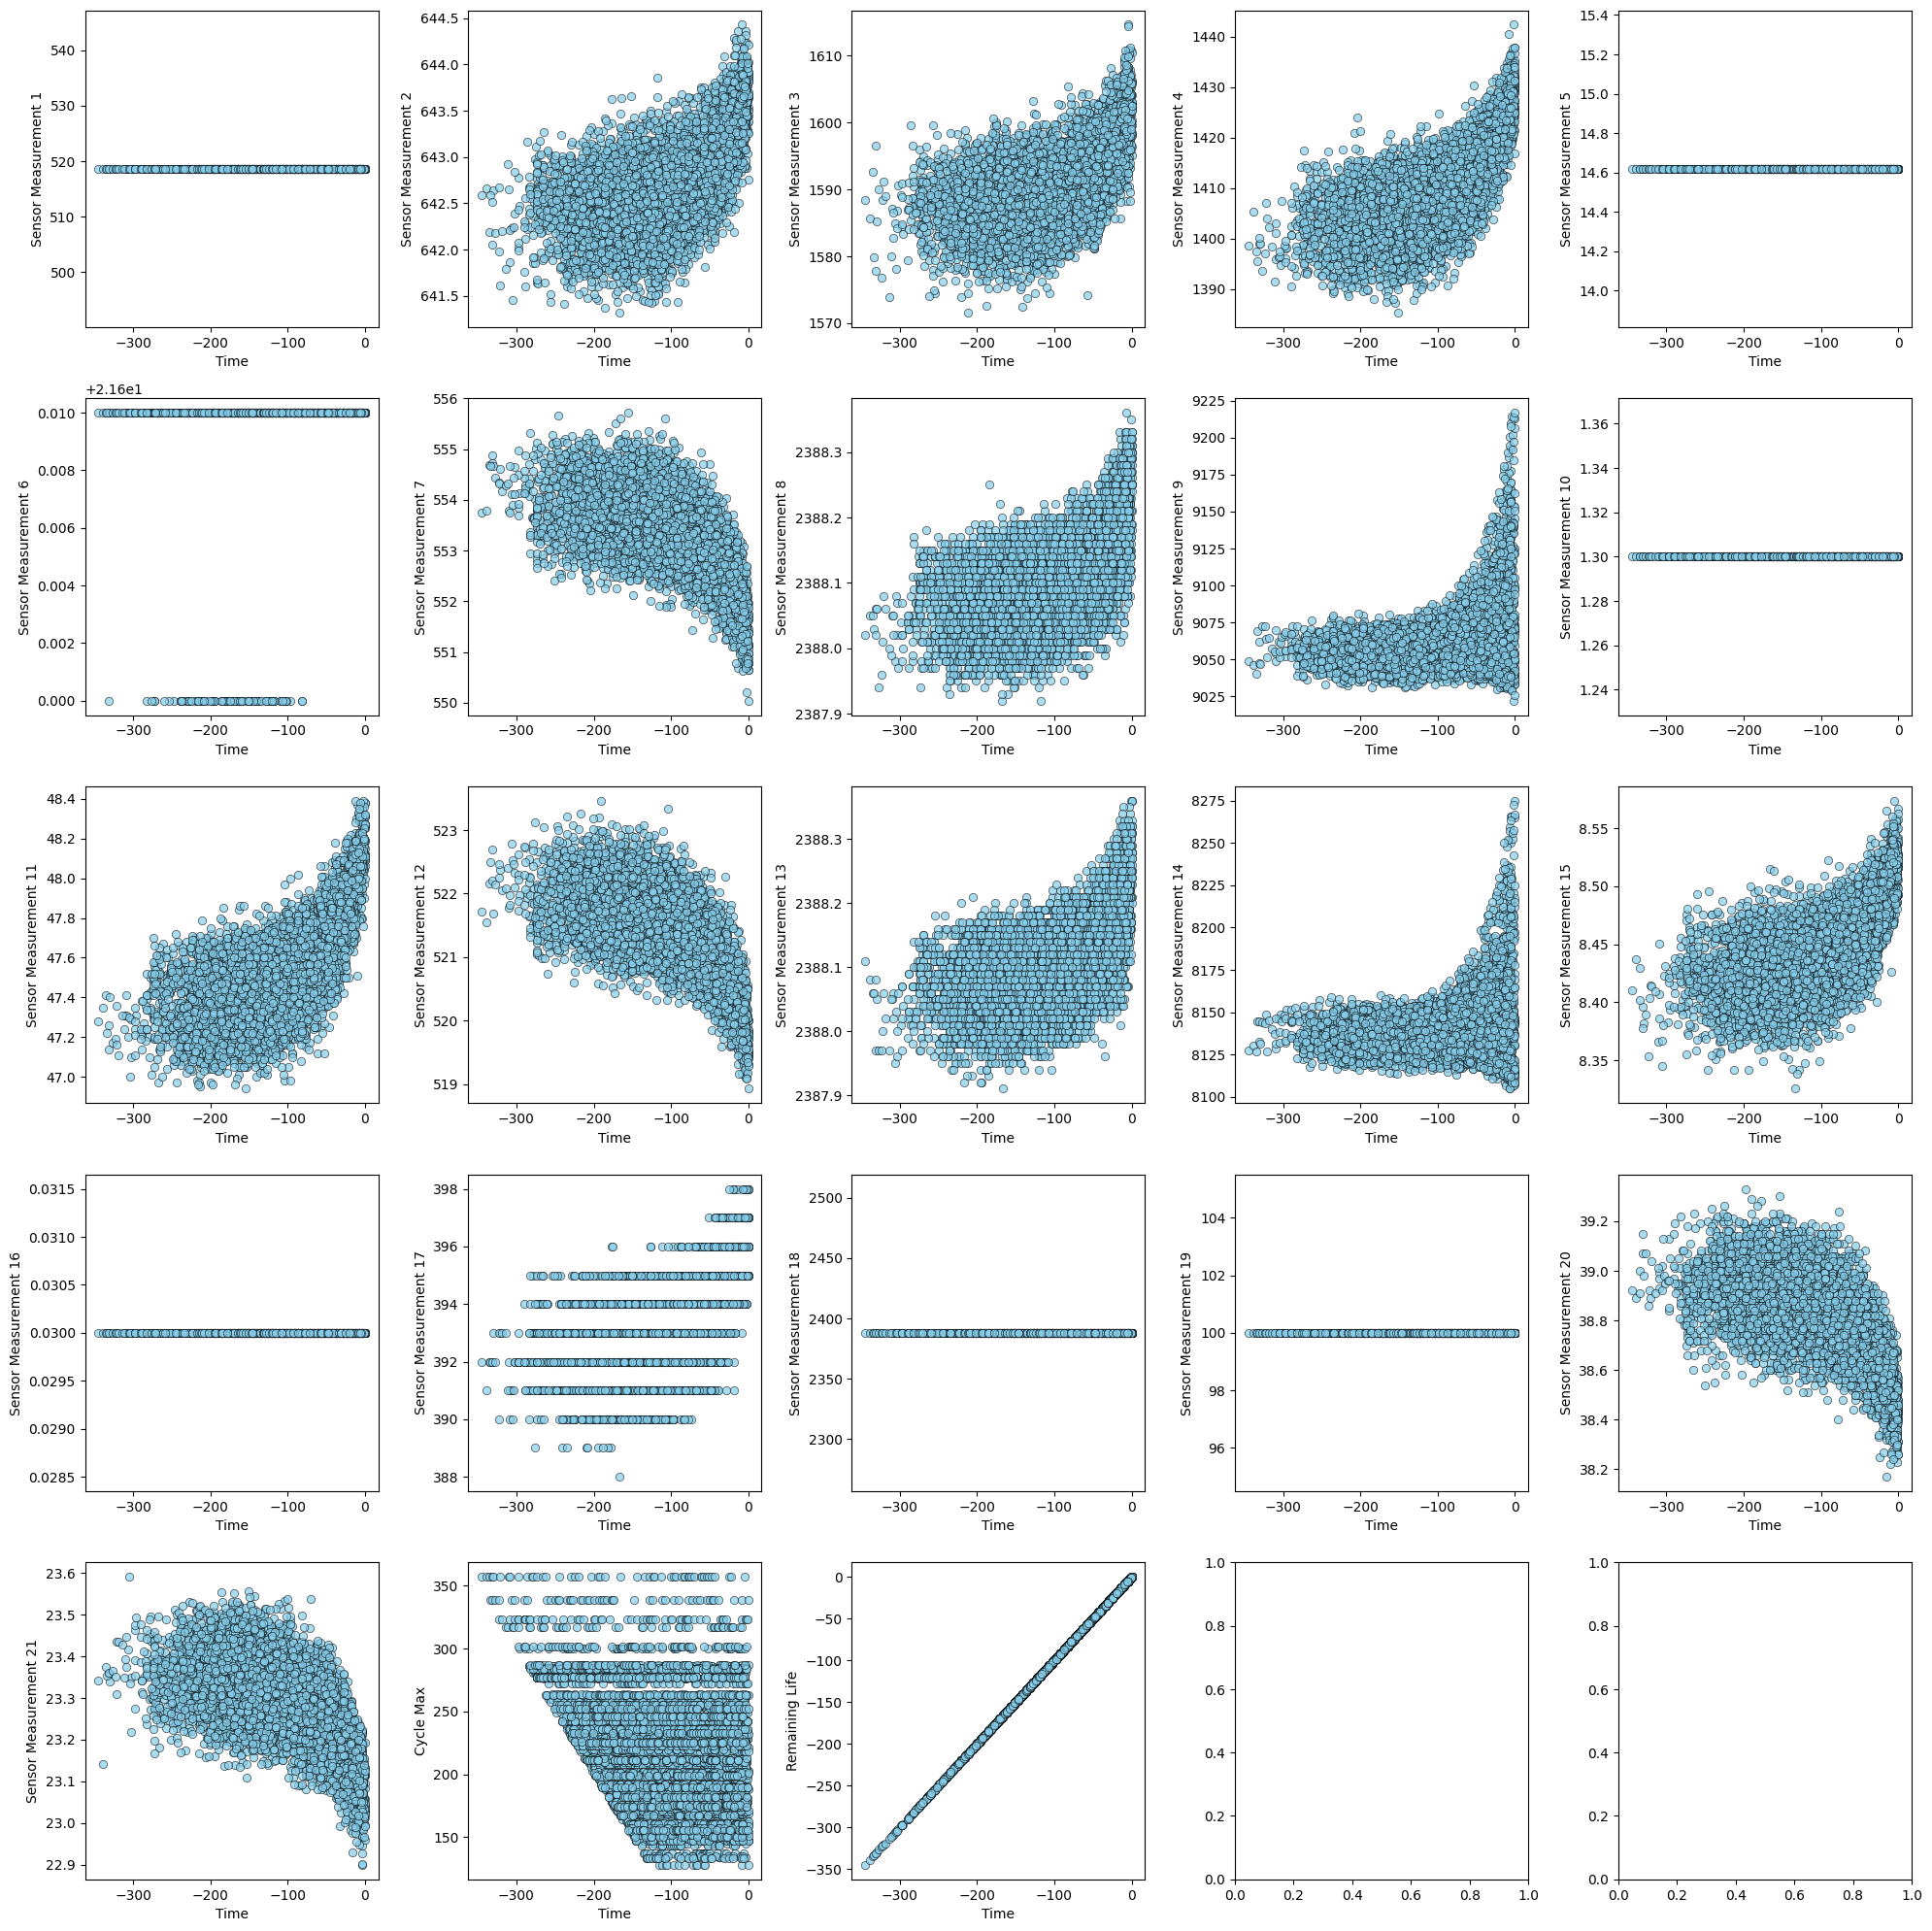

In [13]:
# Plot Remaining Life vs Sensor Measurement of all units and cluster 0

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20)) 

for i in range(len(train.columns)-5):
    # Scatter plot on the ith subplot on cluster 0
    axs[i//5, i-(i//5)*5].scatter(train[train['cluster'] == 0]['Remaining Life'], train[train['cluster'] == 0][train.columns[i+4]], 
                   color='skyblue', alpha=0.7, edgecolors='black', linewidths=0.5)
    axs[i//5, i-(i//5)*5].set_xlabel('Time')
    axs[i//5, i-(i//5)*5].set_ylabel(train.columns[i+4])

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

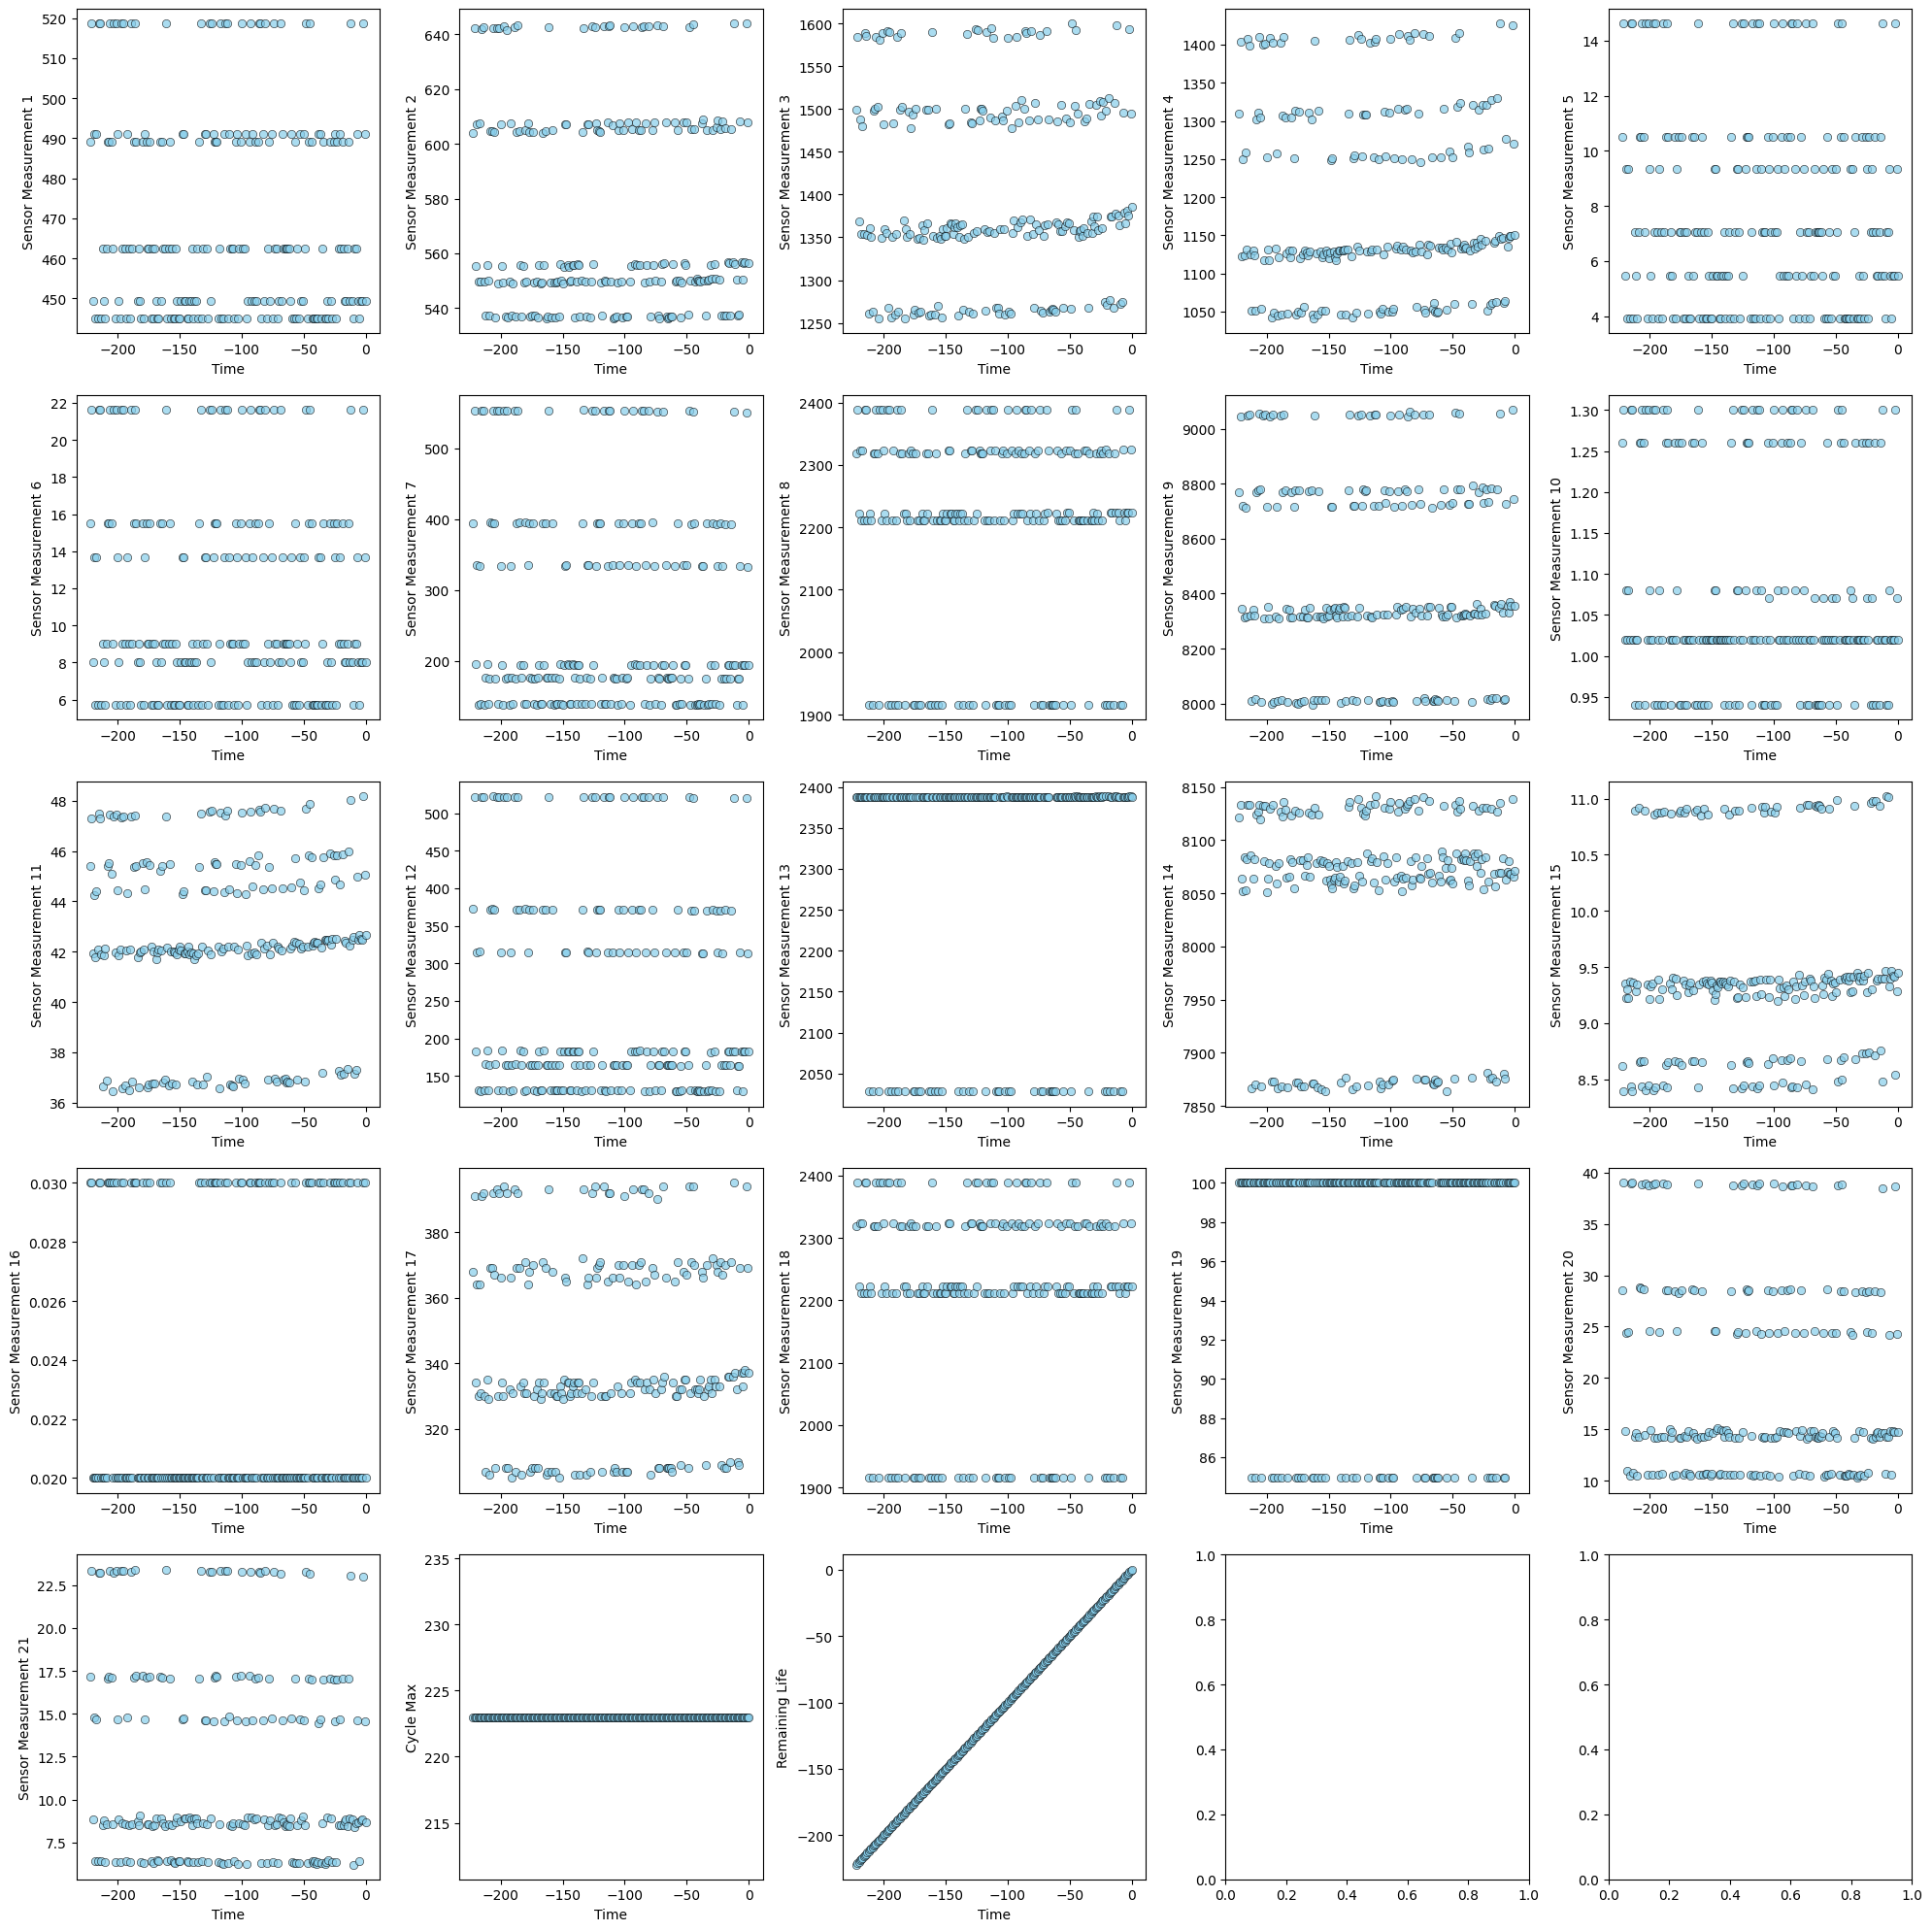

In [14]:
# Plot Remaining Life vs Sensor Measurement of Unit 1 and all clusters

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20)) 

for i in range(len(train.columns)-5):
    # Scatter plot on the ith subplot on cluster 0
    axs[i//5, i-(i//5)*5].scatter(train.loc[1]['Remaining Life'], train.loc[1][train.columns[i+4]], 
                   color='skyblue', alpha=0.7, edgecolors='black', linewidths=0.5)
    axs[i//5, i-(i//5)*5].set_xlabel('Time')
    axs[i//5, i-(i//5)*5].set_ylabel(train.columns[i+4])

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

## Data preprocessing

In [15]:
train.index.unique() 

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218],
      dtype='int64', name='Unit Number', length=218)

In [16]:
# Split data set by units
units = train.index.unique()    # all engine IDs
print(f"Total engines: {len(units)}")

# First split into train+val vs test
training_units, test_units = train_test_split(units, test_size=0.1, random_state=42)
train_units, val_units = train_test_split(training_units, test_size=0.1, random_state=42)
print(f"Total train engines: {len(train_units)}")
print(f"Total val engines: {len(val_units)}")
print(f"Total test engines: {len(test_units)}")


Total engines: 218
Total train engines: 176
Total val engines: 20
Total test engines: 22


In [17]:
# Split data set into training and test sets
# Apply random seed to allow repetition of output

train_set = train[train.index.isin(train_units)].copy()
val_set   = train[train.index.isin(val_units)].copy()
test_set   = train[train.index.isin(test_units)].copy()

In [18]:
# Apply Standard Scaler by cluster to transform the scaling of different features into similar scales.
unique_clusters = train_set['cluster'].unique().tolist()

cluster_mean= pd.DataFrame()
cluster_std= pd.DataFrame()

for i in range(len(unique_clusters)):
    cluster_mean['Cluster ' + str(i+1)] = train_set[train_set['cluster'] == i].mean()
    cluster_std['Cluster ' + str(i+1)] = train_set[train_set['cluster'] == i].std()

cluster_mean = cluster_mean.transpose()
cluster_std = cluster_std.transpose()


In [19]:
# Get normalized sensor measurement - training set
train_scaled_temp= pd.DataFrame()
train_scaled= pd.DataFrame()

for i in range(len(unique_clusters)):
    train_scaled_temp = (train_set[train_set['cluster'] == i] - cluster_mean.loc['Cluster ' + str(i+1)]) / cluster_std.loc['Cluster ' + str(i+1)]
    train_scaled_temp['Time, in cycles Reference'] = train_set[train_set['cluster'] == i]['Time, in cycles']
    train_scaled_temp['Remaining Life Reference'] = train_set[train_set['cluster'] == i]['Remaining Life']
    train_scaled_temp['Cluster Reference'] = train_set[train_set['cluster'] == i]['cluster']
    train_scaled = pd.concat([train_scaled, train_scaled_temp], axis=0)
train_scaled = train_scaled.drop(["Time, in cycles", "Operational Setting 1", "Operational Setting 2", "Operational Setting 3", 
                                  "cluster", "Cycle Max", "Remaining Life"], axis=1)
train_scaled = train_scaled.fillna(0)
train_scaled.rename(columns={'Remaining Life Reference': 'Remaining Life', 'Time, in cycles Reference': 'Time, in cycles', 
                             'Cluster Reference': 'Cluster'}, inplace=True)
train_scaled = train_scaled.sort_values(by='Time, in cycles')
train_scaled

Sensor Measurement 1  Sensor Measurement 2  Sensor Measurement 3  \
Unit Number                                                                     
213                      0.999909             -0.217657             -0.358173   
70                       0.000000             -0.910736             -1.205255   
161                      0.999909             -1.215408              0.218267   
15                       0.000000             -0.987404             -0.431221   
203                      0.000000             -0.063084              0.024303   
...                           ...                   ...                   ...   
5                        0.000000              2.469300              1.342617   
5                        0.999909              1.341913              1.737123   
5                       -0.999909              1.518255              1.329319   
5                        0.999909              1.491461              2.025770   
5                        0.000000              2.401076              2.287839   

             Sensor Measurement 4  Sensor Measurement 5  Sensor Measurement 6  \
Unit Number                                                                     
213                     -0.231344              0.000000             -1.501899   
70                      -1.330706             -0.999910              0.114333   
161                      0.180572             -0.999909             -0.174241   
15                      -0.815739              0.999946              0.853428   
203                      0.383200              0.999909             -1.733810   
...                           ...                   ...                   ...   
5                        2.059170              0.999946              0.853428   
5                        1.202409              0.000000              0.663418   
5                        1.772389              0.999909              1.424519   
5                        2.093035              0.000000              0.663418   
5                        2.938241              0.999946              0.853428   

             Sensor Measurement 7  Sensor Measurement 8  Sensor Measurement 9  \
Unit Number                                                                     
213                      0.413823             -0.234511              0.099296   
70                       1.120670             -0.969278             -0.220807   
161                      1.423890             -0.682449             -0.581541   
15                       0.417823              0.472746             -0.009850   
203                     -0.071800             -0.393448             -0.209458   
...                           ...                   ...                   ...   
5                        0.013536              2.082810              2.730605   
5                       -1.261993              3.338017              2.528896   
5                       -2.496726              2.008217              2.923612   
5                       -2.150175              3.260353              2.654942   
5                       -2.210042              2.411395              2.929244   

             Sensor Measurement 10  ...  Sensor Measurement 15  \
Unit Number                         ...                          
213                       0.557087  ...              -0.035065   
70                       -0.999910  ...              -1.614444   
161                      -0.176445  ...              -0.606507   
15                       -0.149129  ...              -1.236948   
203                       0.102202  ...              -1.351740   
...                            ...  ...                    ...   
5                        -0.149129  ...               2.037884   
5                        -1.794723  ...               1.844052   
5                         0.000000  ...               2.282786   
5                        -1.794723  ...               2.438842   
5                        -0.149129  ...               1.413

In [20]:
# Get normalized sensor measurement - validation set
val_scaled_temp= pd.DataFrame()
val_scaled= pd.DataFrame()

for i in range(len(unique_clusters)):
    val_scaled_temp = (val_set[val_set['cluster'] == i] - cluster_mean.loc['Cluster ' + str(i+1)]) / cluster_std.loc['Cluster ' + str(i+1)]
    val_scaled_temp['Time, in cycles Reference'] = val_set[val_set['cluster'] == i]['Time, in cycles']
    val_scaled_temp['Remaining Life Reference'] = val_set[val_set['cluster'] == i]['Remaining Life']
    val_scaled_temp['Cluster Reference'] = val_set[val_set['cluster'] == i]['cluster']
    val_scaled = pd.concat([val_scaled, val_scaled_temp], axis=0)
val_scaled = val_scaled.drop(["Time, in cycles", "Operational Setting 1", "Operational Setting 2", "Operational Setting 3", 
                                  "cluster", "Cycle Max", "Remaining Life"], axis=1)
val_scaled = val_scaled.fillna(0)
val_scaled.rename(columns={'Remaining Life Reference': 'Remaining Life', 'Time, in cycles Reference': 'Time, in cycles', 
                             'Cluster Reference': 'Cluster'}, inplace=True)
val_scaled = val_scaled.sort_values(by='Time, in cycles')
val_scaled

Sensor Measurement 1  Sensor Measurement 2  Sensor Measurement 3  \
Unit Number                                                                     
149                      0.000000             -0.037502             -0.446243   
75                       0.000000             -0.509833             -0.374684   
218                      0.000000              0.191202              0.263747   
120                      0.000000             -0.718256             -1.168018   
91                       0.999909              0.147905             -0.981950   
...                           ...                   ...                   ...   
147                      0.000000              2.041627              2.719971   
147                      0.000000              1.354968              1.121770   
147                      0.000000              2.291123              3.465460   
147                      0.000000              1.501054              2.025196   
147                      0.000000              2.764939              1.445089   

             Sensor Measurement 4  Sensor Measurement 5  Sensor Measurement 6  \
Unit Number                                                                     
149                      0.162371             -0.999910              0.114333   
75                      -1.478363              0.999946              0.853428   
218                     -0.560232             -0.999910              0.114333   
120                     -0.601592              0.999909             -1.733810   
91                      -0.228762             -0.999909             -0.174241   
...                           ...                   ...                   ...   
147                      2.300549             -0.999910              0.114333   
147                      2.498706              0.999946              0.853428   
147                      1.835529             -0.999910              0.114333   
147                      2.650453             -0.999910              0.114333   
147                      2.545182              0.999946              0.853428   

             Sensor Measurement 7  Sensor Measurement 8  Sensor Measurement 9  \
Unit Number                                                                     
149                      0.280061             -0.527577             -0.488579   
75                       0.597507             -0.217281             -0.397279   
218                      1.108995              0.355826             -0.708949   
120                      1.158679              0.208082              0.214442   
91                       0.895705             -0.225289             -0.197492   
...                           ...                   ...                   ...   
147                     -1.774762              1.680930              1.882539   
147                     -2.210042              1.425641              1.741239   
147                     -1.611310              1.386462              2.013652   
147                     -1.097604              1.239229              2.193175   
147                     -1.131943              1.589934              1.676668   

             Sensor Measurement 10  ...  Sensor Measurement 15  \
Unit Number                         ...                          
149                      -0.999910  ...              -0.627618   
75                       -0.149129  ...              -0.615248   
218                      -0.999910  ...               0.870589   
120                       0.102202  ...              -1.222771   
91                       -0.176445  ...              -1.146088   
...                            ...  ...                    ...   
147                      -0.999910  ...               1.475954   
147                      -0.149129  ...               2.231483   
147                      -0.999910  ...               1.874001   
147                      -0.999910  ...               2.037090   
147                      -0.149129  ...               1.255

In [21]:
# Get normalized sensor measurement - test set
def normalized_sensor(df, unique_clusters, cluster_mean, cluster_std):
    scaled_temp= pd.DataFrame()
    scaled= pd.DataFrame()

    for i in range(len(unique_clusters)):
        scaled_temp = (df[df['cluster'] == i] - cluster_mean.loc['Cluster ' + str(i+1)]) / cluster_std.loc['Cluster ' + str(i+1)]
        scaled_temp['Time, in cycles Reference'] = df[df['cluster'] == i]['Time, in cycles']
        scaled_temp['Remaining Life Reference'] = df[df['cluster'] == i]['Remaining Life']
        scaled_temp['Cluster Reference'] = df[df['cluster'] == i]['cluster']
        scaled = pd.concat([scaled, scaled_temp], axis=0)
    scaled = scaled.drop(["Time, in cycles", "Operational Setting 1", "Operational Setting 2", "Operational Setting 3", 
                                    "cluster", "Cycle Max", "Remaining Life"], axis=1)
    scaled = scaled.fillna(0)
    scaled.rename(columns={'Remaining Life Reference': 'Remaining Life', 'Time, in cycles Reference': 'Time, in cycles', 
                                'Cluster Reference': 'Cluster'}, inplace=True)
    scaled = scaled.sort_values(by='Time, in cycles')
    return scaled

In [22]:
# Get normalized sensor measurement - validation set
train_scaled = normalized_sensor(train_set, unique_clusters, cluster_mean, cluster_std)
val_scaled = normalized_sensor(val_set, unique_clusters, cluster_mean, cluster_std)
test_scaled = normalized_sensor(test_set, unique_clusters, cluster_mean, cluster_std)

In [23]:
# Convert training and test dataset into x and y

xtrain = train_scaled.drop(["Remaining Life"], axis=1)
ytrain = train_scaled["Remaining Life"]

# xtest = val_scaled.drop(["Remaining Life"], axis=1)
# ytest = val_scaled["Remaining Life"]

In [24]:
# Trandability analysis


# Construct Asset Health Indicator

In [25]:
xtrain = train_scaled.drop(["Remaining Life", "Time, in cycles", "Cluster"], axis=1)


In [26]:
# x_sensor = train_scaled[selected_sensors]
def add_health_condition(df):
    rul_per_unit = df.groupby('Unit Number')['Time, in cycles'].max().reset_index()
    rul_per_unit.columns = ["Unit Number", "max_cycle"]
    x_sensor = df.merge(rul_per_unit, on="Unit Number", how="left")
    x_sensor["RUL"] = x_sensor["max_cycle"] - x_sensor["Time, in cycles"]
    x_sensor["Health Condition"] = x_sensor["RUL"] / x_sensor["max_cycle"]
    x_sensor = x_sensor.sort_values(by=['Unit Number', 'Time, in cycles'])
    y_sensor = x_sensor['RUL'].to_frame()
    x_sensor = x_sensor.drop(["Time, in cycles", "Remaining Life", "Cluster", "max_cycle"], axis=1)
    x_sensor = x_sensor.set_index("Unit Number")
    return x_sensor, y_sensor

x_train, y_train = add_health_condition(train_scaled)
x_val, y_val = add_health_condition(val_scaled)
x_test, y_test = add_health_condition(test_scaled)


In [27]:
# Linear Regression on each sensor for RUL
fusion_model = LinearRegression()
slope = []

for sensor in x_train.columns:
    if "Sensor Measurement" in sensor:
        sensor_slope = []
        for unit in x_train.index.unique():
            x = x_train[x_train.index == unit][sensor].to_frame()
            y = x_train[x_train.index == unit]['Health Condition'].to_frame()
            fusion_model.fit(x, y)
            fusion_model.coef_[0]
            sensor_slope.append(fusion_model.coef_[0])
        sensor_median = np.abs(float(np.median(sensor_slope)))
        slope.append((sensor_median, sensor))
        print(sensor, sensor_median)
slope = sorted(slope, reverse=True)[:8]
selected_sensors = [i[1] for i in slope]
selected_sensors
# # Predict on test set
# y_pred = model.predict(xtest)

Sensor Measurement 1 0.004573781699376608
Sensor Measurement 2 0.1839609794283429
Sensor Measurement 3 0.1828522294990898
Sensor Measurement 4 0.23313327180159077
Sensor Measurement 5 0.0020326531625308617
Sensor Measurement 6 0.11043681061120789
Sensor Measurement 7 0.1514449051759768
Sensor Measurement 8 0.16331703529609282
Sensor Measurement 9 0.22175079884205484
Sensor Measurement 10 0.03547828307062945
Sensor Measurement 11 0.256198518603389
Sensor Measurement 12 0.16493182235323905
Sensor Measurement 13 0.1674880732013061
Sensor Measurement 14 0.1917313477331587
Sensor Measurement 15 0.23110037422214597
Sensor Measurement 16 0.033719158845922484
Sensor Measurement 17 0.19192033479922535
Sensor Measurement 18 0.0
Sensor Measurement 19 0.0021708672995948866
Sensor Measurement 20 0.13737609951392615
Sensor Measurement 21 0.13751276395115336


['Sensor Measurement 11',
 'Sensor Measurement 4',
 'Sensor Measurement 15',
 'Sensor Measurement 9',
 'Sensor Measurement 17',
 'Sensor Measurement 14',
 'Sensor Measurement 2',
 'Sensor Measurement 3']

In [28]:
# Linear Regression for fused sensor
model = LinearRegression()
slope = []

x = x_train[selected_sensors]
y = x_train["Health Condition"]
model.fit(x, y)

LinearRegression()

In [29]:
# Evaluate the model
for i in range(len(selected_sensors)):
    print(selected_sensors[i],  model.coef_[i])
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

Sensor Measurement 11 -0.07715074362982365
Sensor Measurement 4 -0.04924876438791817
Sensor Measurement 15 -0.046160993111711
Sensor Measurement 9 -0.04863363111377662
Sensor Measurement 17 -0.02463219166355358
Sensor Measurement 14 -0.015783167701766233
Sensor Measurement 2 -0.02244325910895635
Sensor Measurement 3 -0.0197056298719033
Intercept: 0.49761575767427957
Slope: [-0.07715074 -0.04924876 -0.04616099 -0.04863363 -0.02463219 -0.01578317
 -0.02244326 -0.01970563]


In [30]:
def sensor_fuse(df):
    fused_list = []
    for i in df.index.unique():
        out = df[df.index == i][selected_sensors].values @ model.coef_
        out = pd.Series(out).rolling(window=21, center=True, min_periods=1).mean().values
        out = out + 1.0 - out[0]
        fused = pd.DataFrame({"health_indicator": out})
        fused_list.append(fused)
    return fused_list

In [31]:
train_fused = sensor_fuse(x_train)
val_fused = sensor_fuse(x_val)
test_fused = sensor_fuse(x_test)

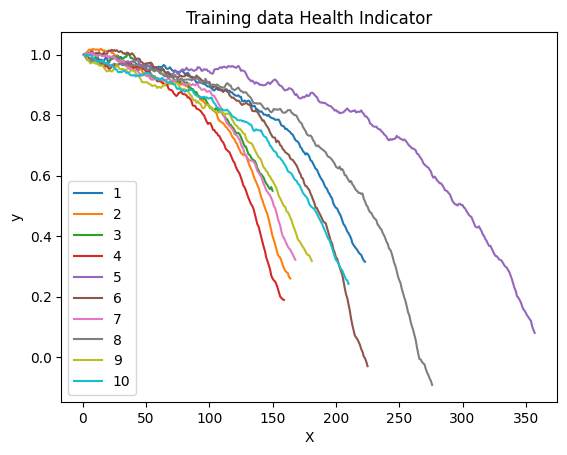

In [32]:
# Plot
for i in range(len(train_fused[:10])):
    plt.plot(np.arange(1, len(train_fused[i])+1), train_fused[i], label=i+1)       # actual data points
plt.xlabel('X')
plt.ylabel('y')
# plt.ylim(0)
plt.legend()
plt.title('Training data Health Indicator')
plt.show()

In [33]:
from dataclasses import dataclass
from typing import List, Tuple, Dict
@dataclass
class ResidualSimilarityModel:
    k: int = 50
    polys: List[np.ndarray] = None     # per-training-engine poly coeffs (degree 2)
    lengths: List[int] = None          # per-training-engine lengths

    def fit(self, train_fused: List[pd.DataFrame]) -> "ResidualSimilarityModel":
        self.polys = []
        self.lengths = []
        for df in train_fused:
            y = df["health_indicator"].values.astype(float)
            t = np.arange(len(y), dtype=float)
            # degree-2 polynomial fit
            p = np.polyfit(t, y, deg=2)  # returns [a, b, c]
            self.polys.append(p)
            self.lengths.append(len(y))
        return self

    def _distance(self, y_obs: np.ndarray, p: np.ndarray) -> float:
        t = np.arange(len(y_obs), dtype=float)
        y_hat = np.polyval(p, t)
        return float(np.mean(np.abs(y_obs - y_hat)))  # L1/n (normalized by length)

    def predict_rul_distribution(self, obs_fused: pd.DataFrame) -> Tuple[float, Tuple[float, float], np.ndarray]:
        """
        Given observed prefix for one engine, find k nearest (smallest residual distance)
        and use their (N_train - len_obs) as the neighbor RULs.
        Returns (estimated_RUL_median, (ci_low, ci_high), neighbor_RUL_array)
        """
        y_obs = obs_fused["health_indicator"].values.astype(float)
        len_obs = len(y_obs)

        dists, neighbor_ruls = [], []
        for p, n_total in zip(self.polys, self.lengths):
            d = self._distance(y_obs, p)
            dists.append(d)
            neighbor_ruls.append(max(0, n_total - len_obs))  # ensure non-negative

        dists = np.array(dists)
        neighbor_ruls = np.array(neighbor_ruls, dtype=float)

        # pick k nearest neighbors
        k_eff = min(self.k, len(dists))
        nn_idx = np.argpartition(dists, kth=k_eff - 1)[:k_eff]
        nn_ruls = neighbor_ruls[nn_idx]

        # estimate as median; 90% CI via 5th/95th percentiles (as in MATLAB visual)
        est = float(np.median(nn_ruls))
        ci = (float(np.percentile(nn_ruls, 5)), float(np.percentile(nn_ruls, 95)))
        return est, ci, nn_ruls, nn_idx, neighbor_ruls

In [34]:
# Residual-similarity model
mdl = ResidualSimilarityModel(k=50).fit(train_fused)



In [35]:
import math

# Evaluate on one validation engine at 50%, 70%, 90%
vidx = 3 if len(val_fused) >= 3 else 0  # pick the 3rd one if available
series = val_fused[vidx]["health_indicator"].values
n = len(series)
for frac in [0.5, 0.7, 0.9]:
    L = int(math.ceil(n * frac))
    obs = pd.DataFrame({"health_indicator": series[:L]})
    true_rul = n - L
    est, (lo, hi), nn_ruls, nn_idx, __ = mdl.predict_rul_distribution(obs)
    print(f"\nObserved {int(frac*100)}% of life:")
    print(f"  True RUL = {true_rul} cycles")
    print(f"  Estimated RUL (median of {len(nn_ruls)} neighbors) = {est:.1f}")
    print(f"  90% CI ≈ [{lo:.1f}, {hi:.1f}]")
    print(f"  k ≈ {nn_idx}")


Observed 50% of life:
  True RUL = 81 cycles
  Estimated RUL (median of 50 neighbors) = 80.0
  90% CI ≈ [58.7, 141.9]
  k ≈ [ 31  71 129   2 130  29  54 108  25  48  12  16   9 167   6   1  72 113
  94  82 131 107 146 149 135  45  49 120 106  50 109  62 165 144  86 160
 174  56 112   3   8  90 159  99  92 173  38  44  33 153]

Observed 70% of life:
  True RUL = 48 cycles
  Estimated RUL (median of 50 neighbors) = 56.0
  90% CI ≈ [33.0, 91.5]
  k ≈ [129   2  31   6  16  71 113  54  50 165   9 130  25  44 108  29   8 106
 119  12   1 127 174 131  48 112 167  99  82  90 162 123 107  94  85  56
 120 135  33 146  45  49 173  22 114  66  95 149  58 134]

Observed 90% of life:
  True RUL = 16 cycles
  Estimated RUL (median of 50 neighbors) = 22.5
  90% CI ≈ [1.0, 42.0]
  k ≈ [ 16   6  50 130   2 129  44  54 108 165 119 127 106  12 123 167   1   8
 113 174 131  48  58 112  49 107  85  63  90  31 101  25  94  22   9 162
 173 135  71 114 146  29  34  33  99 134  13 149 132  57]


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Tuple, Sequence, Union

def plot_rul_distribution(trueRUL: Optional[float],
                          estRUL: float,
                          pdfRUL: Union[Sequence[float], Tuple[Sequence[float], Sequence[float]]],
                          ciRUL: Tuple[float, float],
                          bins: int = 20,
                          title: str = "RUL Distribution (Neighbors / PDF)") -> None:
    plt.figure(figsize=(9,5))
    if isinstance(pdfRUL, tuple) and len(pdfRUL) == 2:
        xs, pdf = np.asarray(pdfRUL[0], dtype=float), np.asarray(pdfRUL[1], dtype=float)
        plt.plot(xs, pdf, linewidth=2, label="PDF")
        xmin, xmax = xs.min(), xs.max()
    else:
        samples = np.asarray(pdfRUL, dtype=float)
        plt.hist(samples, bins=bins, density=True, alpha=0.6, label="Neighbor RUL samples")
        xmin, xmax = samples.min(), samples.max()

    lo, hi = ciRUL
    for x, lbl, ls in [(estRUL, "Estimate", "-"),
                       (lo, "CI Low", "--"),
                       (hi, "CI High", "--")]:
        plt.axvline(x, linestyle=ls, linewidth=2, label=lbl)

    if trueRUL is not None:
        plt.axvline(trueRUL, linestyle=":", linewidth=2, label="True RUL")

    plt.xlim(max(0, xmin - 0.05*(xmax - xmin)), xmax + 0.05*(xmax - xmin))
    plt.xlabel("RUL (cycles)")
    plt.ylabel("Density")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


In [37]:
def plot_rul(model: ResidualSimilarityModel,
            df: pd.DataFrame,
            trueRUL: Optional[float],
            frac: Optional[float],
            bins: int = 20):
                        
    # Residual-similarity model
    estRUL, ciRUL, __, nn_idx, pdfRUL = model.predict_rul_distribution(df)
    pdfRUL = neighbor_ruls   # e.g., from your model's k-NN step (array-like)

    fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=False)
    labels = 1
    # --- Left: Histogram ---
    for i in nn_idx:
        if labels == 1:
            axes[0].plot(np.arange(1, len(train_fused[i])+1), train_fused[i], alpha= 0.4, color="lightblue", label="Nearest Neighbor Engine")       # actual data points
            labels = 0
        else:
            axes[0].plot(np.arange(1, len(train_fused[i])+1), train_fused[i], alpha= 0.4, color="lightblue")       # actual data points
        axes[0].plot(len(train_fused[i])+1, train_fused[i].iloc[-1], marker='X', color="black")       # actual data points
    axes[0].plot(np.arange(1, len(df)+1), df, label="Validation Engine")       # actual data points
    axes[0].set_xlabel('Operating Cycles')
    axes[0].set_ylabel('Health Indicator')
    axes[0].set_ylim(0)
    axes[0].set_xlim(0, 350)
    axes[0].grid(True)
    axes[0].legend()
    axes[0].set_title('Engine Health Indicator at ' + str(frac) + '% Life')

    # --- Right: RUL Distribution ---
    if isinstance(pdfRUL, tuple) and len(pdfRUL) == 2:
        xs, pdf = np.asarray(pdfRUL[0], dtype=float), np.asarray(pdfRUL[1], dtype=float)
        axes[1].plot(xs, pdf, linewidth=2, label="PDF")
        xmin, xmax = xs.min(), xs.max()
    else:
        samples = np.asarray(pdfRUL, dtype=float)
        axes[1].hist(samples, bins=bins, density=True, alpha=0.6, label="Neighbor RUL samples")
        xmin, xmax = samples.min(), samples.max()

    lo, hi = ciRUL
    for x, lbl, ls in [(estRUL, "Estimate", "-"),
                       (lo, "CI Low", "--"),
                       (hi, "CI High", "--")]:
        axes[1].axvline(x, linestyle=ls, linewidth=2, label=lbl)

    if trueRUL is not None:
        axes[1].axvline(trueRUL, linestyle=":", linewidth=2, label="True RUL")

    axes[1].set_xlim(max(0, xmin - 0.05*(xmax - xmin)), xmax + 0.05*(xmax - xmin))
    axes[0].set_ylim(0)
    axes[1].set_xlabel("RUL (cycles)")
    axes[1].set_ylabel("Density")
    axes[1].legend()
    axes[1].set_title('Engine RUL Distribution from Neighbor Samples at ' + str(frac) + '% Life')
    axes[1].grid(True)


In [38]:
import os
# Where to save the figures
PROJECT_ROOT_DIR = "."

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "figures/")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=False, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


Observed 5% of life:
  True RUL = 153 cycles
  Estimated RUL (median of 30 neighbors) = 188.5
  90% CI ≈ [125.5, 232.6]
Saving figure RUL 0.05

Observed 10% of life:
  True RUL = 145 cycles
  Estimated RUL (median of 30 neighbors) = 181.5
  90% CI ≈ [117.5, 224.6]
Saving figure RUL 0.1

Observed 15% of life:
  True RUL = 137 cycles
  Estimated RUL (median of 30 neighbors) = 173.5
  90% CI ≈ [113.0, 235.8]
Saving figure RUL 0.15

Observed 20% of life:
  True RUL = 129 cycles
  Estimated RUL (median of 30 neighbors) = 162.5
  90% CI ≈ [105.0, 228.2]
Saving figure RUL 0.2

Observed 25% of life:
  True RUL = 121 cycles
  Estimated RUL (median of 30 neighbors) = 147.5
  90% CI ≈ [94.3, 220.2]
Saving figure RUL 0.25

Observed 30% of life:
  True RUL = 113 cycles
  Estimated RUL (median of 30 neighbors) = 126.5
  90% CI ≈ [86.3, 195.2]
Saving figure RUL 0.3

Observed 35% of life:
  True RUL = 105 cycles
  Estimated RUL (median of 30 neighbors) = 104.5
  90% CI ≈ [78.3, 178.2]
Saving figure R

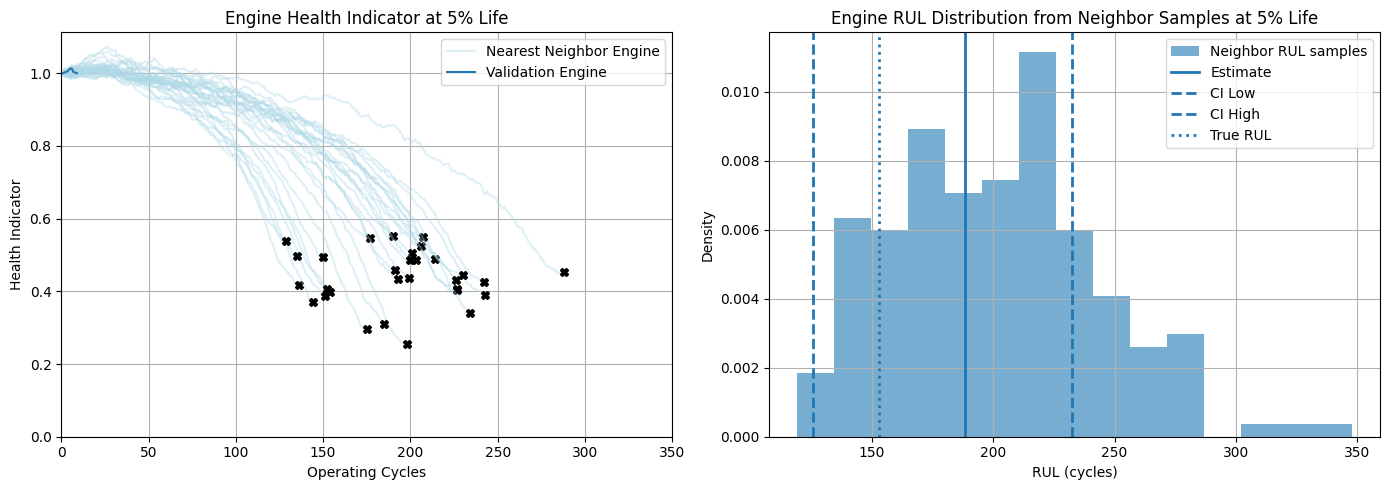

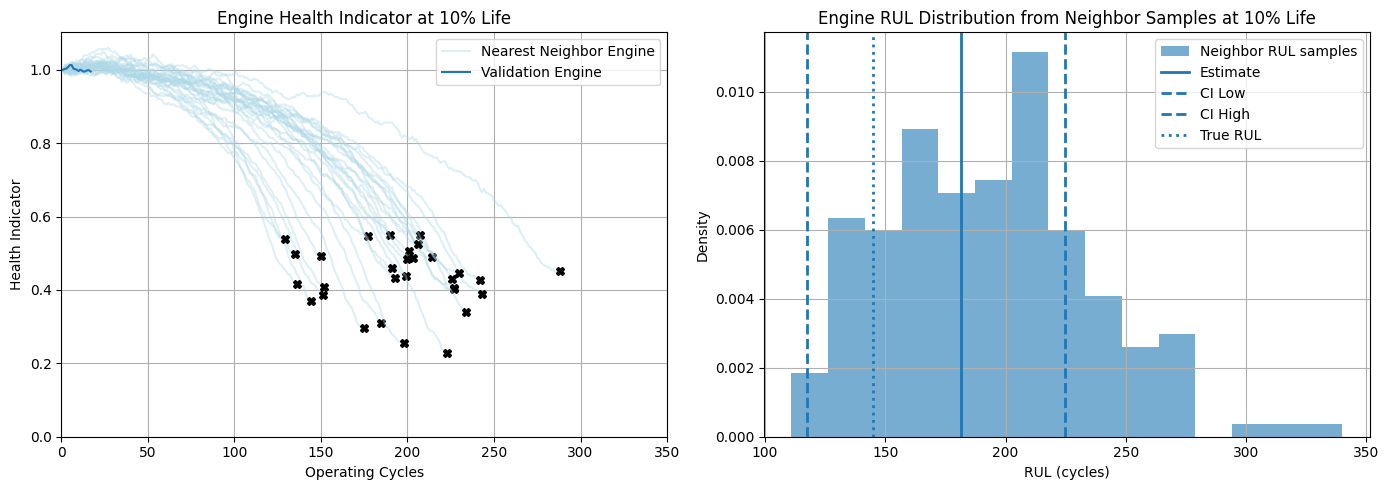

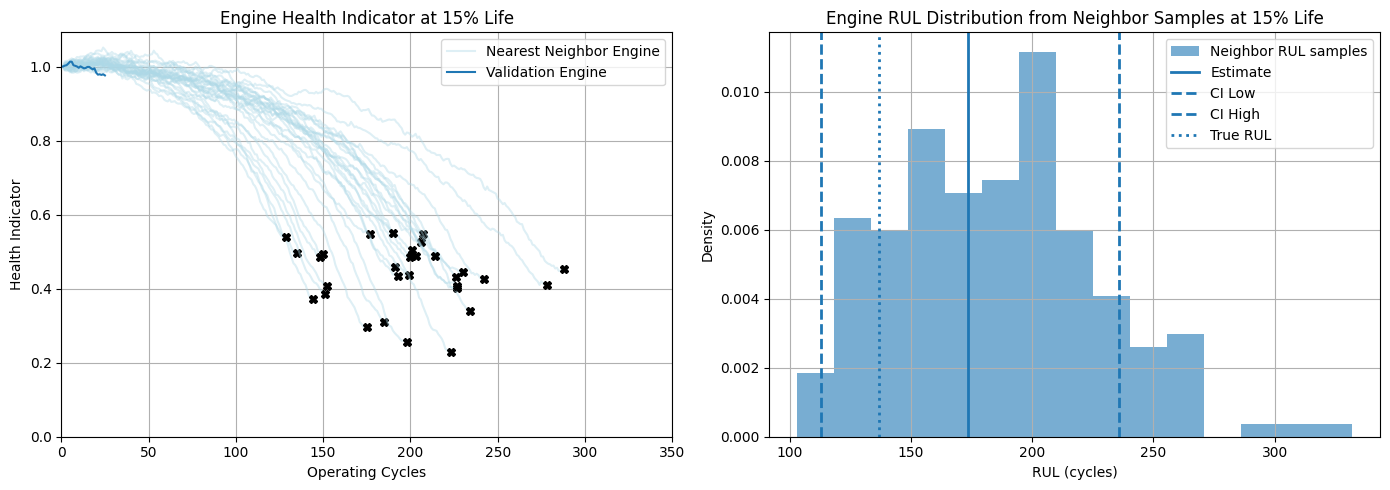

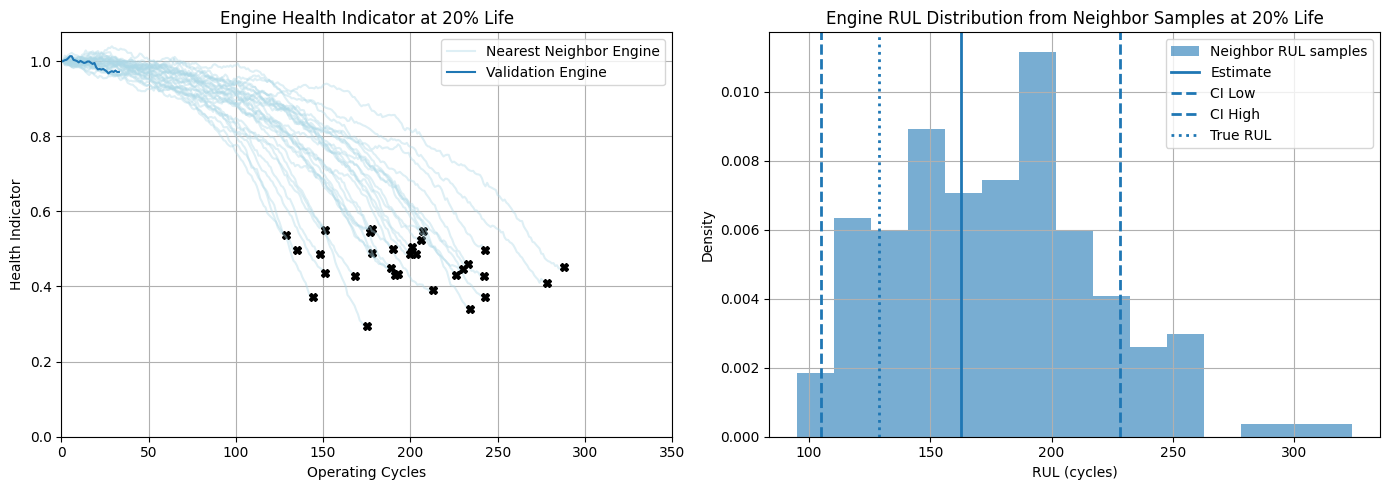

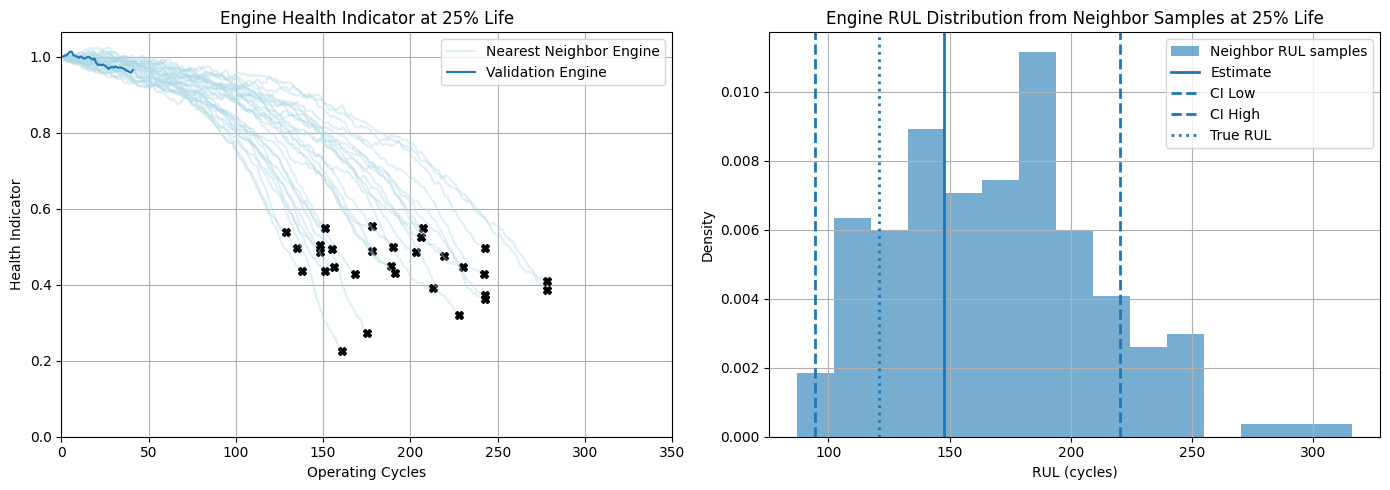

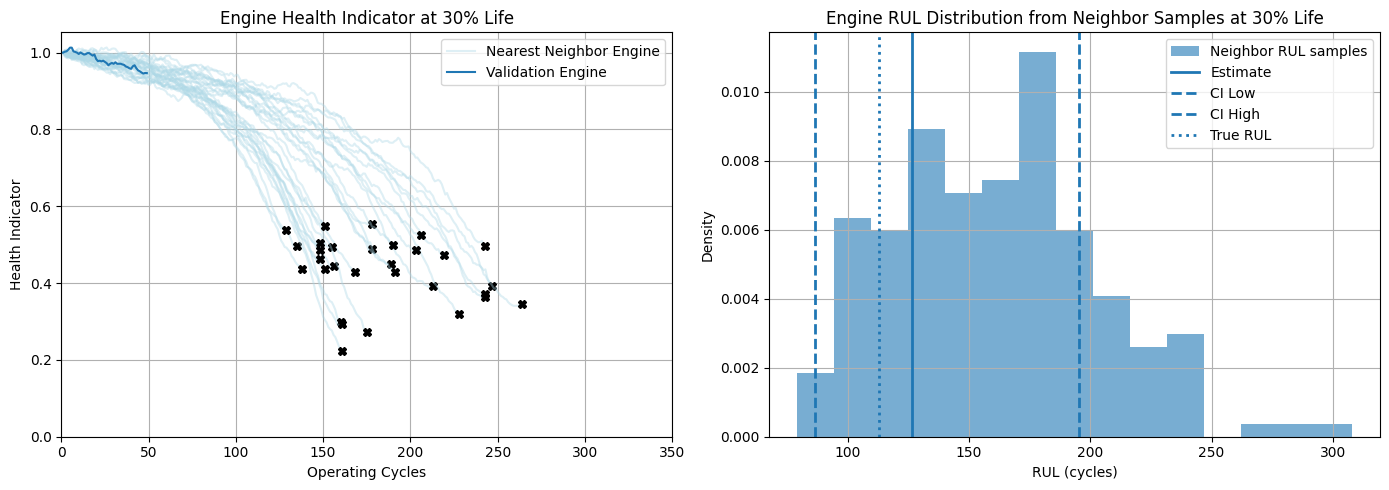

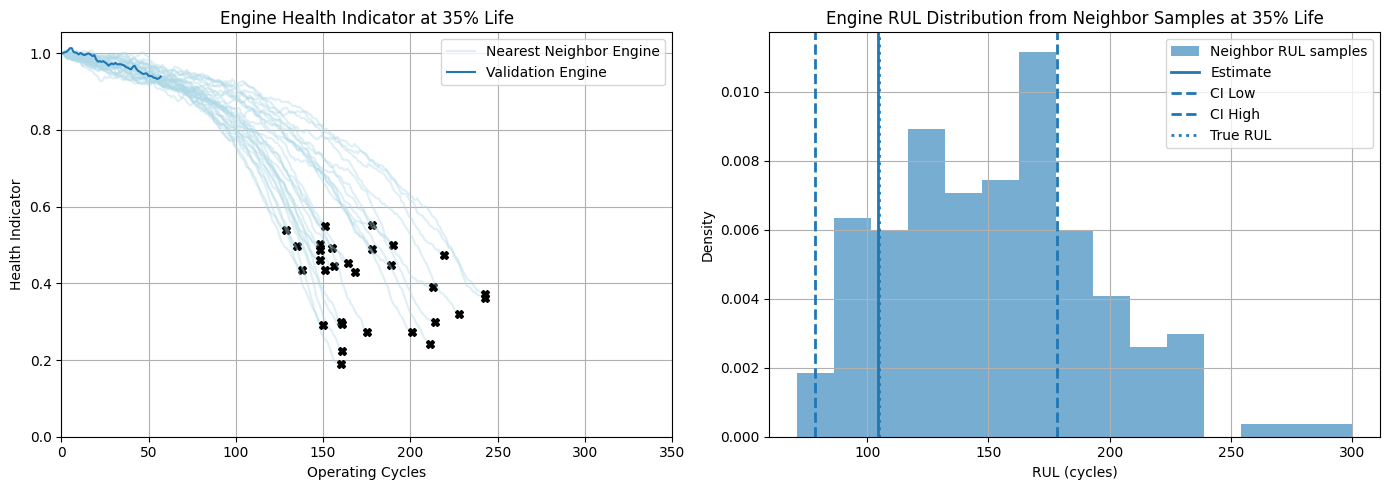

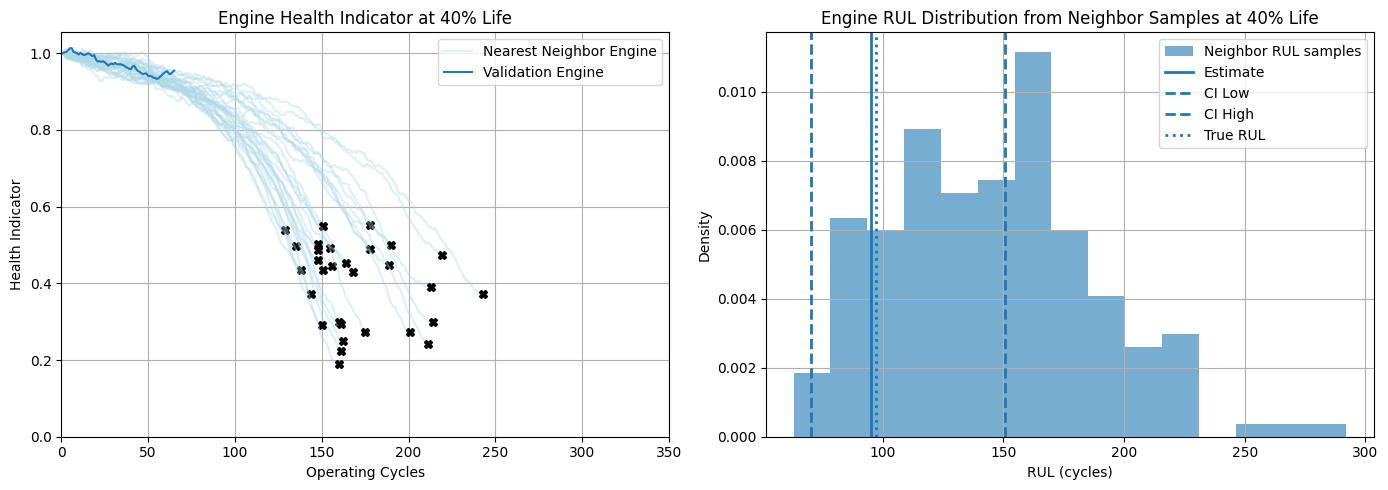

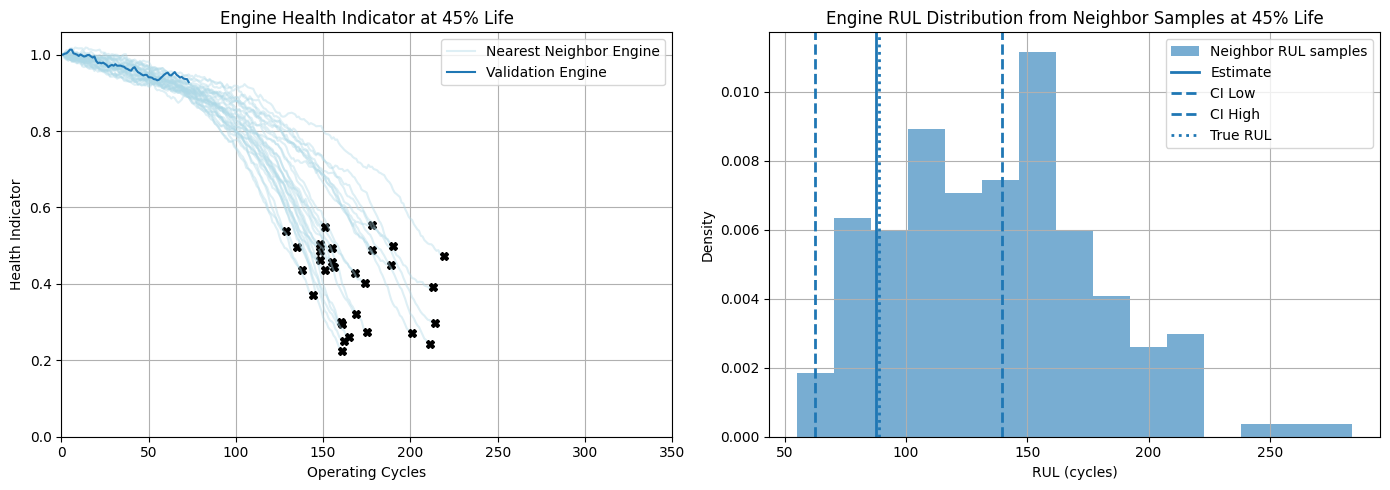

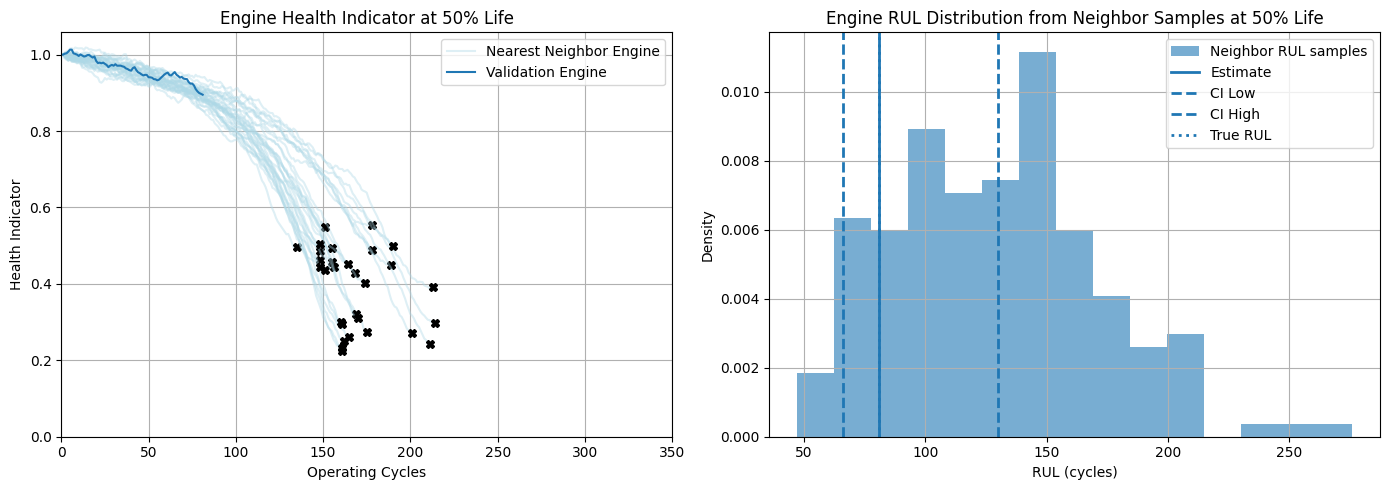

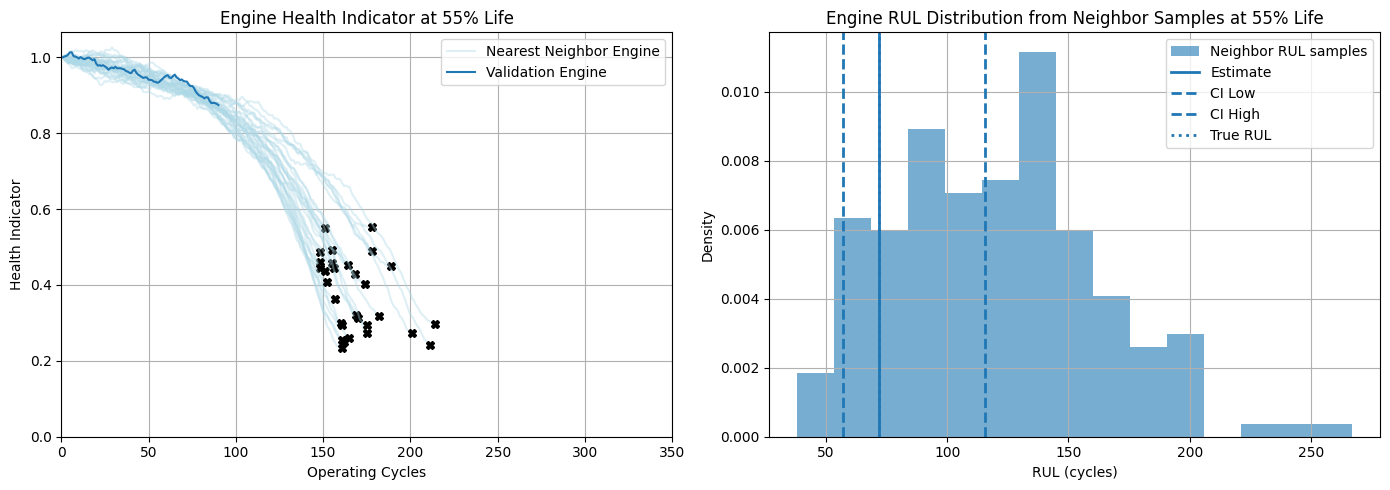

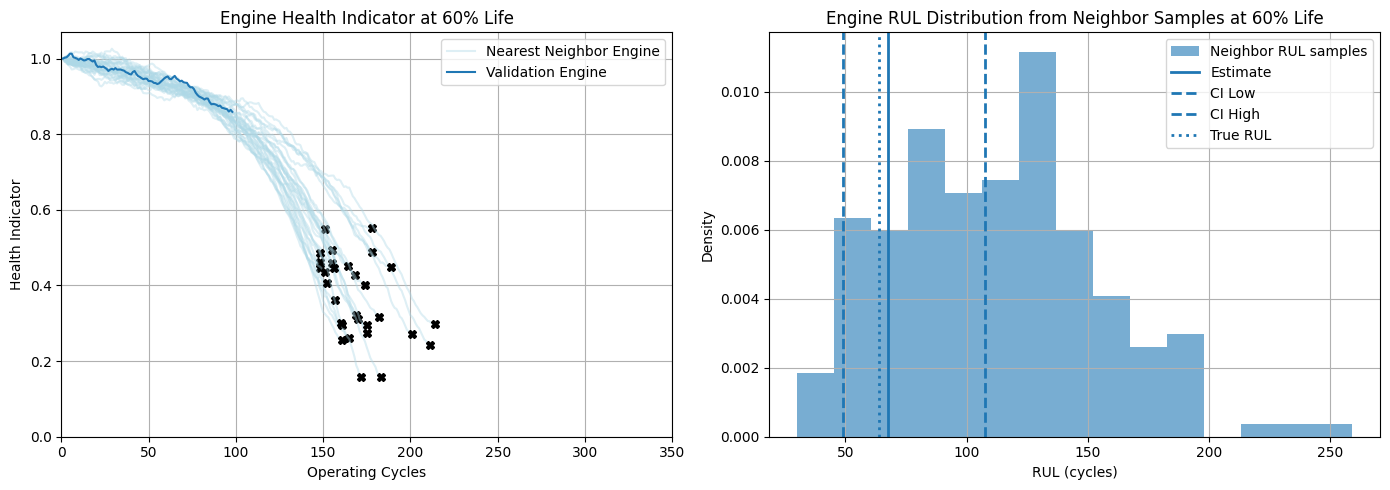

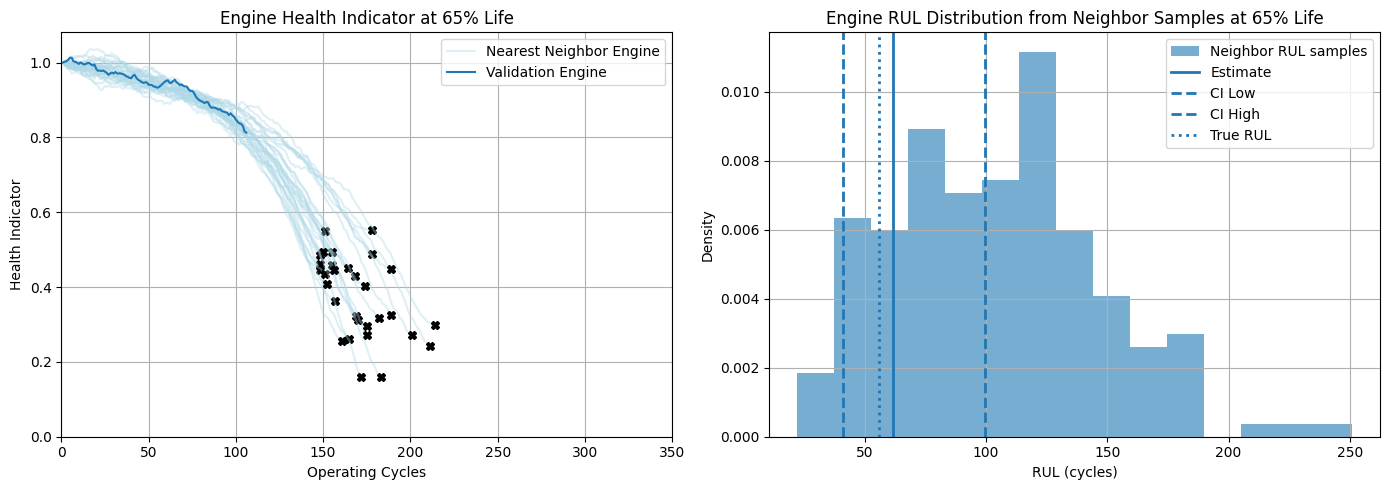

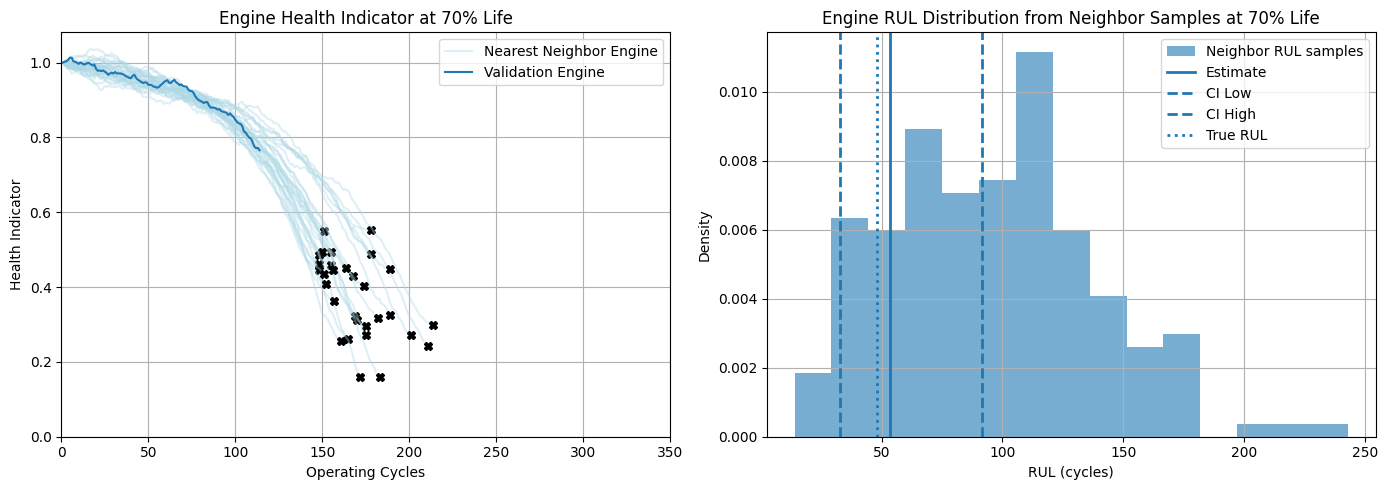

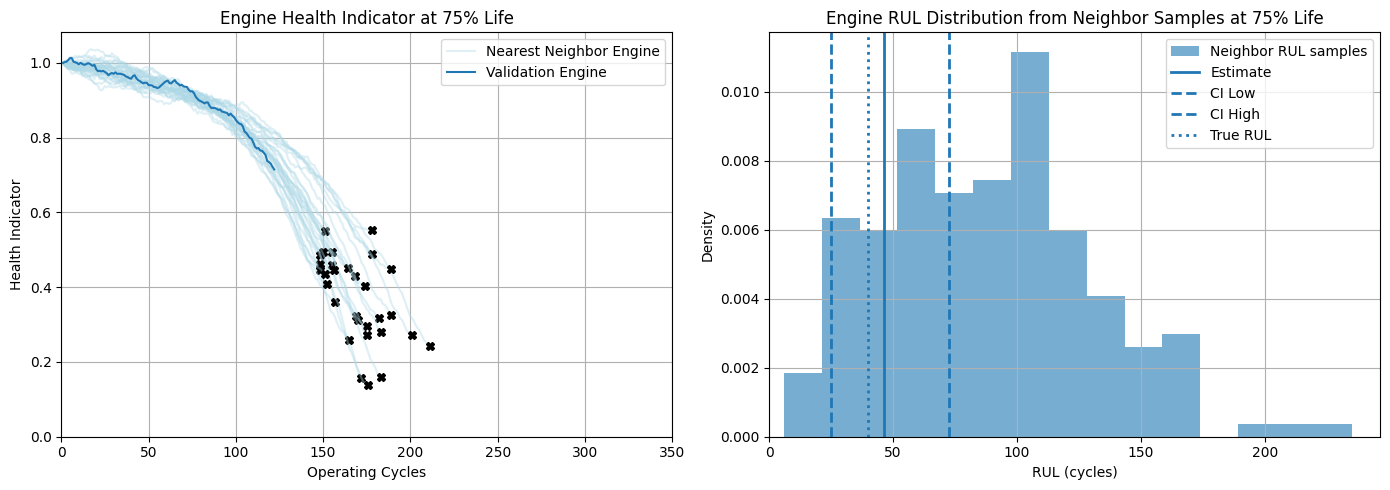

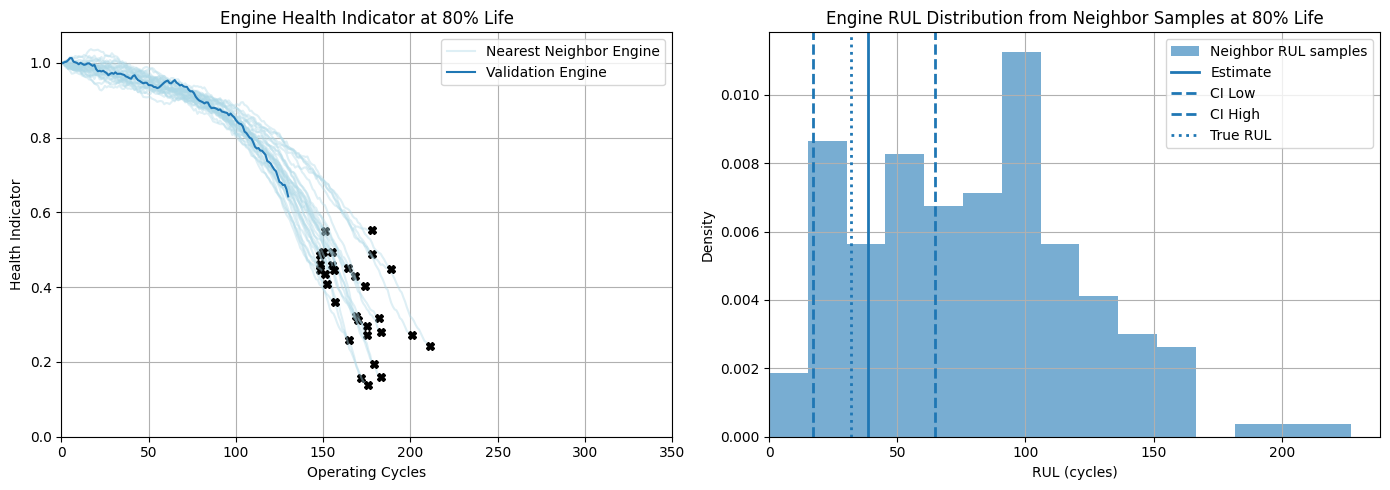

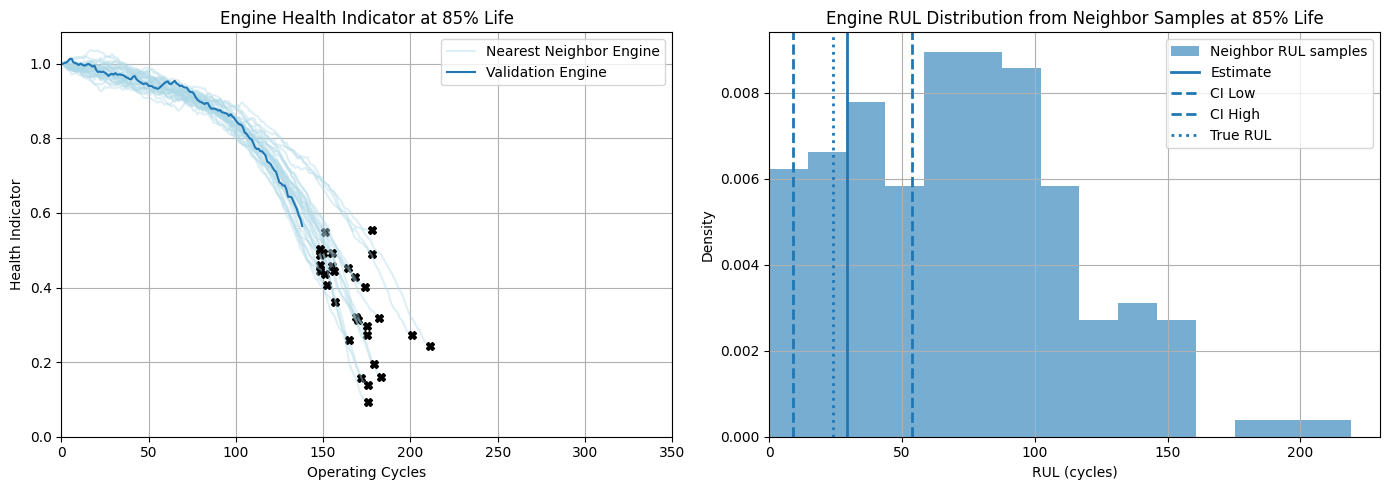

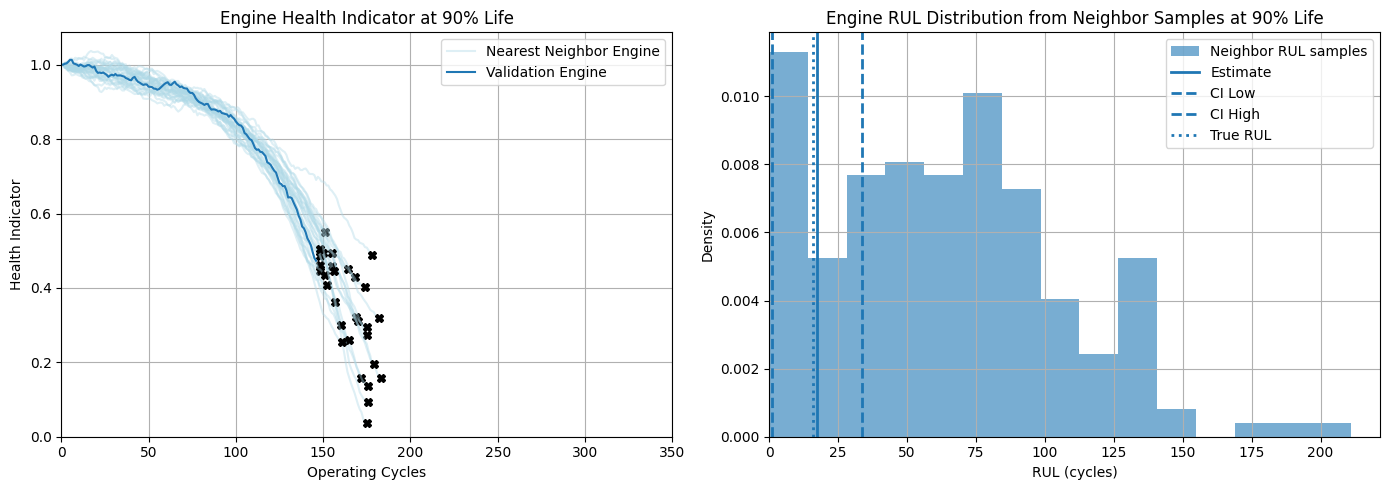

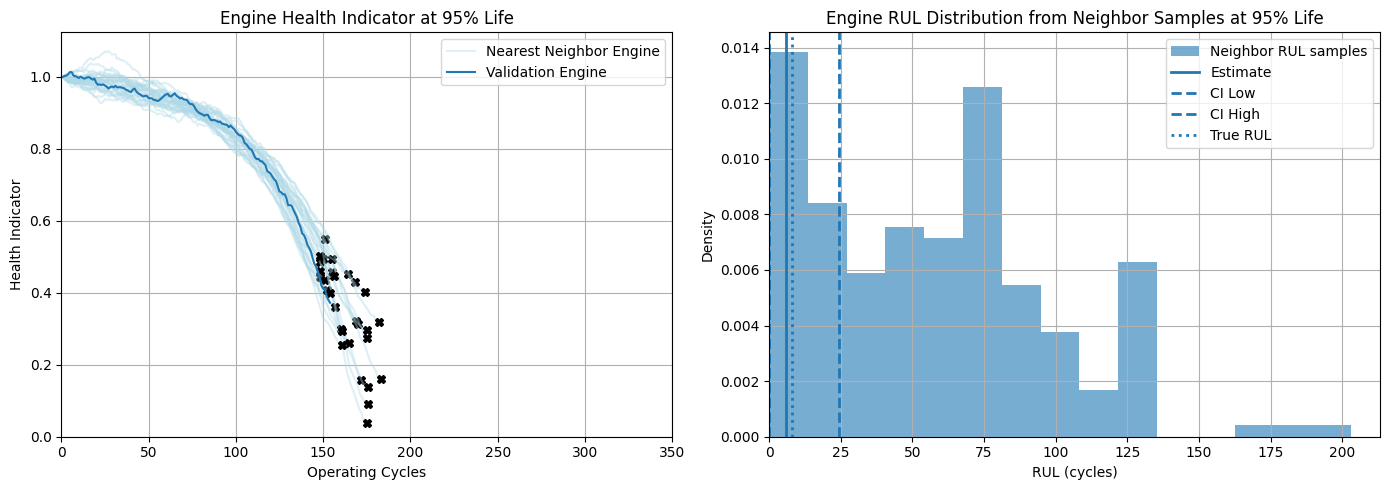

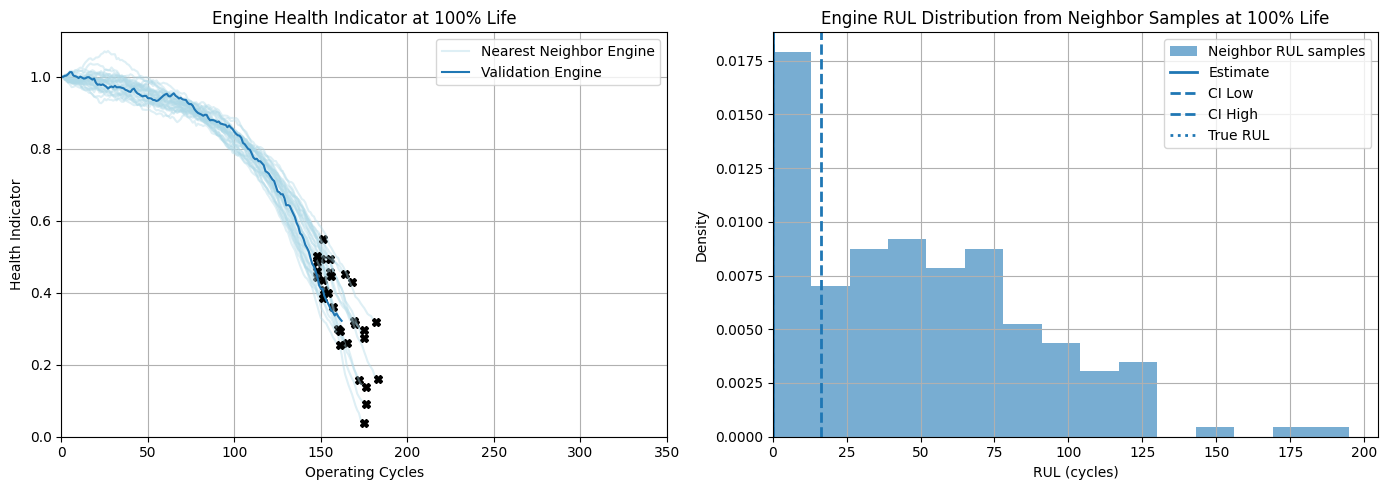

In [39]:
import math
# Residual-similarity model
mdl = ResidualSimilarityModel(k=30).fit(train_fused)

# Evaluate on one validation engine at 50%, 70%, 90%
vidx = 3 if len(val_fused) >= 3 else 0  # pick the 3rd one if available
series = val_fused[vidx]["health_indicator"].values
n = len(series)
# Plot
for i in range(5,105,5):
    frac = i / 100
    L = int(math.ceil(n * frac))
    obs = pd.DataFrame({"health_indicator": series[:L]})
    est, (lo, hi), nn_ruls, nn_idx, neighbor_ruls = mdl.predict_rul_distribution(obs)
    true_rul = n - L
    print(f"\nObserved {int(frac*100)}% of life:")
    print(f"  True RUL = {true_rul} cycles")
    print(f"  Estimated RUL (median of {len(nn_ruls)} neighbors) = {est:.1f}")
    print(f"  90% CI ≈ [{lo:.1f}, {hi:.1f}]")
    plot_rul(model=mdl, df=obs, trueRUL=true_rul, frac=int(frac*100), bins=15)
    save_fig("RUL " + str(frac), tight_layout=True, fig_extension="png", resolution=300)

In [40]:
import numpy as np
import torch
from PIL import Image
import os

def generate_gif():
    img_dir =  "figures/"  
    gif_path = "figures/RUL.gif" 
    img_list = [f for f in os.listdir(img_dir) if f.endswith('.png')]
    images = [Image.open(img_dir + img).convert('RGBA') for img in img_list]
    images[0].save(gif_path, save_all=True, append_images=images[1:], optimize=False, duration=1000, loop=0)
    with open(gif_path, 'rb') as f: display(IPImage(data=f.read(), format='png'))

In [41]:
len(val_fused)

20

In [50]:
# Perform evaluation on validation set
k=5
mdl = ResidualSimilarityModel(k=k).fit(train_fused)
# Evaluate on one validation engine at 50%, 70%, 90%
vidx = val_units 

prediction = pd.DataFrame({'5%': [], '10%': [], '15%': [], 
                           '20%': [], '25%': [], '30%': [], '35%': [], '40%': [], 
                           '45%': [], '50%': [], '55%': [], '60%': [], '65%': [], 
                           '70%': [], '75%': [], '80%': [], '85%': [], '90%': [], 
                           '95%': [], '100%': []})

truth = pd.DataFrame({'5%': [], '10%': [], '15%': [], 
                           '20%': [], '25%': [], '30%': [], '35%': [], '40%': [], 
                           '45%': [], '50%': [], '55%': [], '60%': [], '65%': [], 
                           '70%': [], '75%': [], '80%': [], '85%': [], '90%': [], 
                           '95%': [], '100%': []})

for vidx in range(len(val_fused)):
    series = val_fused[vidx]["health_indicator"].values
    n = len(series)
    ypred = []
    yhat = []
    # Plot
    for i in range(5,105,5):
        frac = i / 100
        L = int(math.ceil(n * frac))
        obs = pd.DataFrame({"health_indicator": series[:L]})
        est, (lo, hi), nn_ruls, nn_idx, neighbor_ruls = mdl.predict_rul_distribution(obs)
        true_rul = n - L
        ypred.append(est)
        yhat.append(true_rul)
    prediction.loc[len(prediction)] = ypred
    truth.loc[len(truth)] = yhat
error = truth - prediction
error.max()


5%      118.0
10%     156.0
15%     168.0
20%     153.0
25%     105.0
30%     105.0
35%      81.0
40%      71.0
45%      70.0
50%      45.0
55%      45.0
60%      45.0
65%      46.0
70%      46.0
75%      39.0
80%      38.0
85%      36.0
90%      32.0
95%      16.0
100%      0.0
dtype: float64

In [43]:
type(error.mean())

pandas.core.series.Series

In [46]:
test = "RUL"
if "RULs" in test:
    print(1)

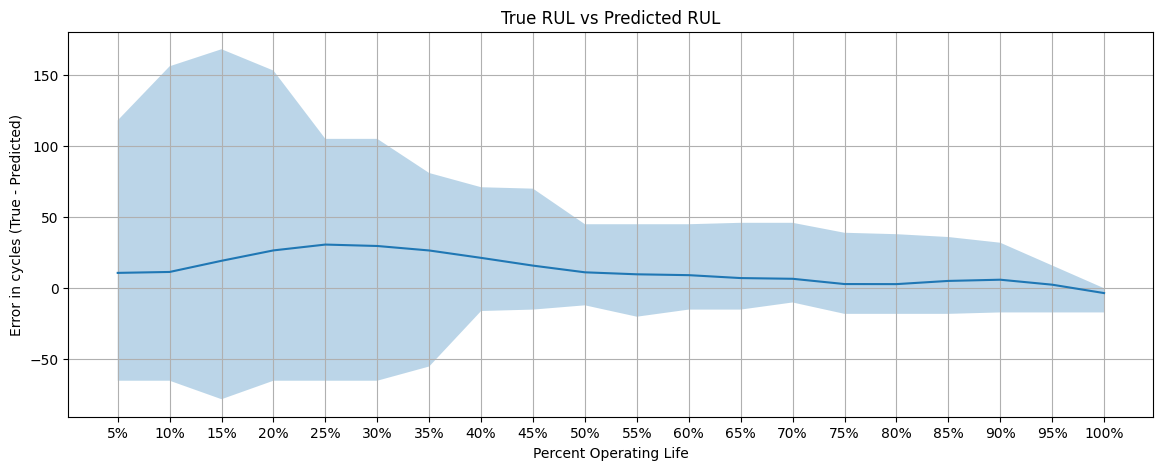

In [51]:
# Plot
plt.figure(figsize=(14,5))
plt.plot(error.mean().index, error.mean())     
plt.fill_between(error.mean().index, error.min(), error.max(), alpha=0.3, label="Band")
plt.xlabel('Percent Operating Life')
plt.ylabel('Error in cycles (True - Predicted)')
# plt.ylim(0)
plt.title('True RUL vs Predicted RUL')
plt.grid()
plt.show()

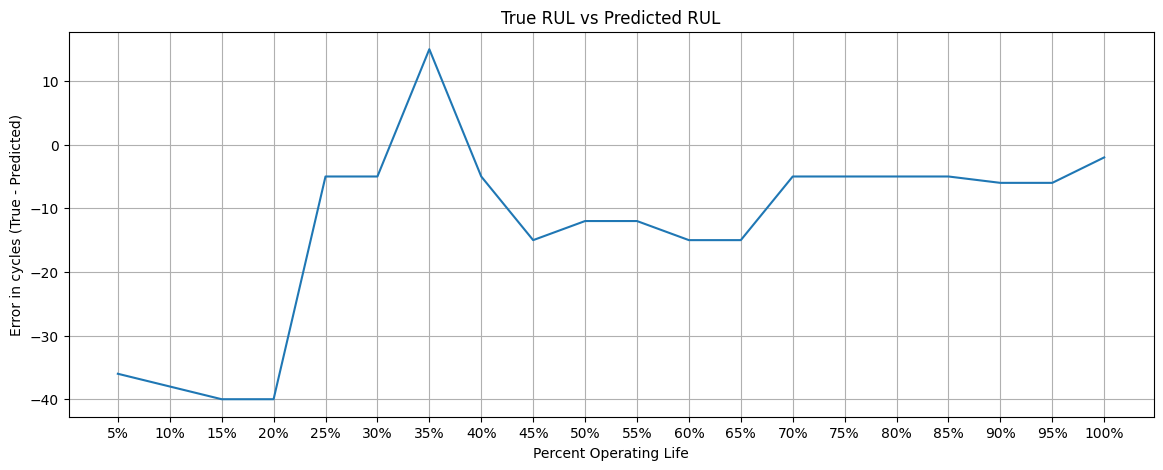

In [49]:
# Perform evaluation on validation set
k=k
mdl = ResidualSimilarityModel(k=k).fit(train_fused)
# Evaluate on one validation engine at 50%, 70%, 90%
vidx = 3 

prediction = pd.DataFrame({'5%': [], '10%': [], '15%': [], 
                        '20%': [], '25%': [], '30%': [], '35%': [], '40%': [], 
                        '45%': [], '50%': [], '55%': [], '60%': [], '65%': [], 
                        '70%': [], '75%': [], '80%': [], '85%': [], '90%': [], 
                        '95%': [], '100%': []})

truth = pd.DataFrame({'5%': [], '10%': [], '15%': [], 
                        '20%': [], '25%': [], '30%': [], '35%': [], '40%': [], 
                        '45%': [], '50%': [], '55%': [], '60%': [], '65%': [], 
                        '70%': [], '75%': [], '80%': [], '85%': [], '90%': [], 
                        '95%': [], '100%': []})

series = val_fused[vidx]["health_indicator"].values
n = len(series)
ypred = []
yhat = []
# Plot
for i in range(5,105,5):
    frac = i / 100
    L = int(math.ceil(n * frac))
    obs = pd.DataFrame({"health_indicator": series[:L]})
    est, (lo, hi), nn_ruls, nn_idx, neighbor_ruls = mdl.predict_rul_distribution(obs)
    true_rul = n - L
    ypred.append(est)
    yhat.append(true_rul)
prediction.loc[len(prediction)] = ypred
truth.loc[len(truth)] = yhat
error = truth - prediction
error.mean()
# Plot
plt.figure(figsize=(14,5))
plt.plot(error.mean().index, error.mean())       # actual data points
plt.xlabel('Percent Operating Life')
plt.ylabel('Error in cycles (True - Predicted)')
# plt.ylim(0)
plt.title('True RUL vs Predicted RUL')
plt.grid()
